<a href="https://colab.research.google.com/github/AnatoliyZhuk/Knowledge/blob/main/StatisticOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1/>Основы статистики</h1>



**Литература**
>  Владимир Соловьев - Статистика и Котики <br/>
>  Сара Бослаф - Статистика для всех <br/>
>  Стентон Гланц - Медико-биологическая статистика (http://medstatistic.ru/articles/glantz.pdf)<br/>
> Jerrold H. Zar.  Biostatistical Analysis.


**Подготовим необходимые библиотеки.**


In [ ]:
import math
import statistics
from scipy import stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Генеральная совокупность** – множество всех объектов, относительно которых делаются выводы в рамках исследования.<br>
Генеральная совокупность может насчитывать огромное количество наблюдений - чтобы иметь возможность проводить исследования выделяют выборку.<br>
<br>
**Выборка** – часть генеральной совокупности элементов, которая охватывается экспериментом (наблюдением, опросом).<br>
<br>
**Репрезентативность выборки** - соответствие характеристик выборки характеристикам генеральной совокупности.<br> 
Репрезентативность определяет, насколько возможно обобщать результаты исследования с привлечением определённой выборки на всю генеральную совокупность, из которой она была собрана.

+ **Простая случайная выборка (simple random sample)**
<br>
Случайным образом выбираем элементы из генеральной совокупности.<br>
При увеличении все больше напоминает генеральную совокупность по своим свойствам.<br>
<br>
+ **Стратифицированная выборка (stratified sample)**<br>
Перед тем как случайным образом извлекать элементы генеральной совокупности для исследования, нужно разбить генеральную совокупность на обособленные, различные по своей природе **страты** (по признаку пола, возраста и тд).<br>
</br>
+ **Групповая выборка (claster sample)**
<br>
В отличие от стратифицированной выборки, здесь кластеры очень похожи между собой (разделение города на несколько географических районов).

**Типы переменных**</br>
</br>
**Количественные (numerical)** 
+ **Непрерывные** - могут принимать абсолютно любые значения на данном промежутке. Возможный вариант [0; 1]
+ **Дискретные** - могут принимать определенные значения. Возможный вариант (1, 2, 3, 4).

**Номинативные или качественные (categorical)** – разделение на группы по категориям. За цифрами не стоит математического смысла. Возможный вариант (1 - мужчины, 2 - женщины).</br>
</br>
**Ранговые (ordinal)** – происходит сравнение (распределение мест в забеге).

**Рассмотрим какие графики мы можем использовать для поиска статистических закономерностей.**

**Histogramm (гистограмма)** – график, показывающий как часто значение переменной встречается на определенном промежутке.<br>

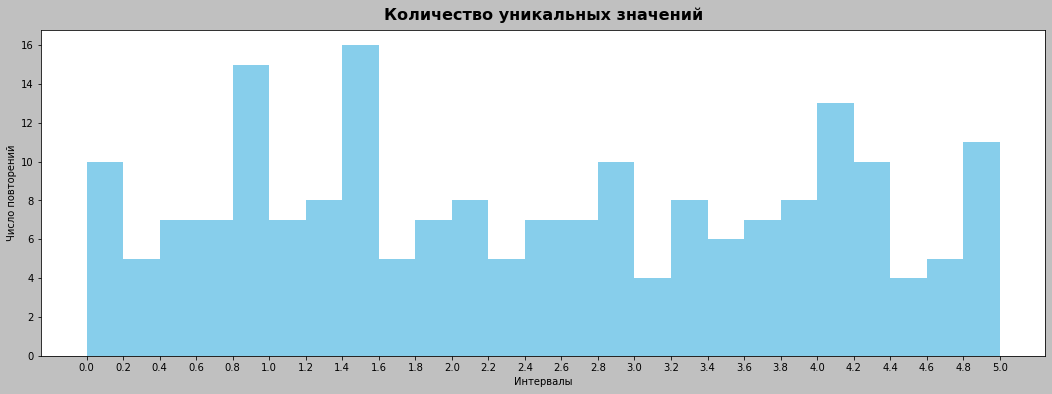

In [ ]:
# bins определяет число интервалов на гистограмме. Можно передавать список.
# loc местоположение заголовка
# fontsize - размер шрифта
# fontweight - насыщенность шрифта
b = np.arange(0, 5.05, 0.2)

histo_data = np.random.sample(200) * 5
plt.figure(figsize=(18,6),facecolor='silver')

plt.xlabel('Интервалы')
plt.ylabel('Число повторений')
plt.xticks(np.arange(0, 5.1, 0.2))
plt.title('Количество уникальных значений', fontsize=16, fontweight='bold', loc='center', pad=10)
plt.hist(histo_data, bins=b, color = "skyblue")
None

**Dot plot (точечный график)** – график, в котором каждой точке соответствует одно значение выборки.<br/>

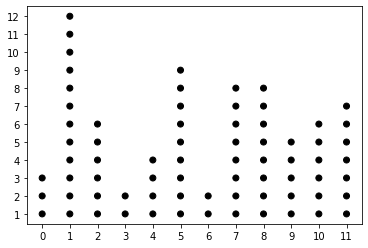

In [ ]:
data = np.random.randint(0,12,size=72) # Переменная data - массив из 72 целых чисел
bins = np.arange(13)-0.5 # Переменная bins [-0.5, 0.5, 1.5, 2.5, ..., 12.5]

hist, edges = np.histogram(data, bins) # np.histogram - записывает количество чисел из data, которые поместились в промежутки переменной bins

y = np.arange(1,hist.max()+1) # от 1 до максимального количества на интервале 
x = np.arange(12) # от 0 до 11

plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0, 14, 1))
X,Y = np.meshgrid(x,y) # прямоугольная сетка из массива значений

plt.scatter(X,Y, c=Y<=hist, cmap="Greys")
None


**Scatter plot (диаграмма рассеяния)** – диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости.

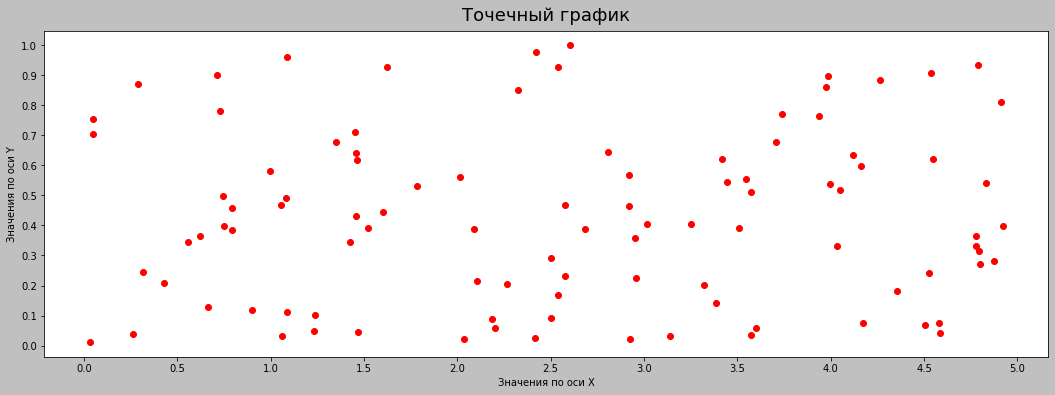

In [ ]:
x = np.random.sample(100) * 5
y = np.random.sample(100)

plt.figure(figsize=(18,6),facecolor='silver')
plt.xlabel('Значения по оси X')
plt.xticks(np.arange(0, 5.5, 0.5))


plt.ylabel('Значения по оси Y')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.title('Точечный график', fontsize=18, pad=10)
plt.scatter(x, y, color ='r')
None

**Box plot (ящик с усами)** – график, показывающий медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. В ящик попадают значения (50% измерений), лежащих между квантилями 0.25 и 0.75. Вверх и вниз от ящика исходят два отрезка: **нижний и верхний ус**. Точки, превышающие в своем отклонении полтора межквартильных размаха, отображаются отдельно и называются **выбросы**.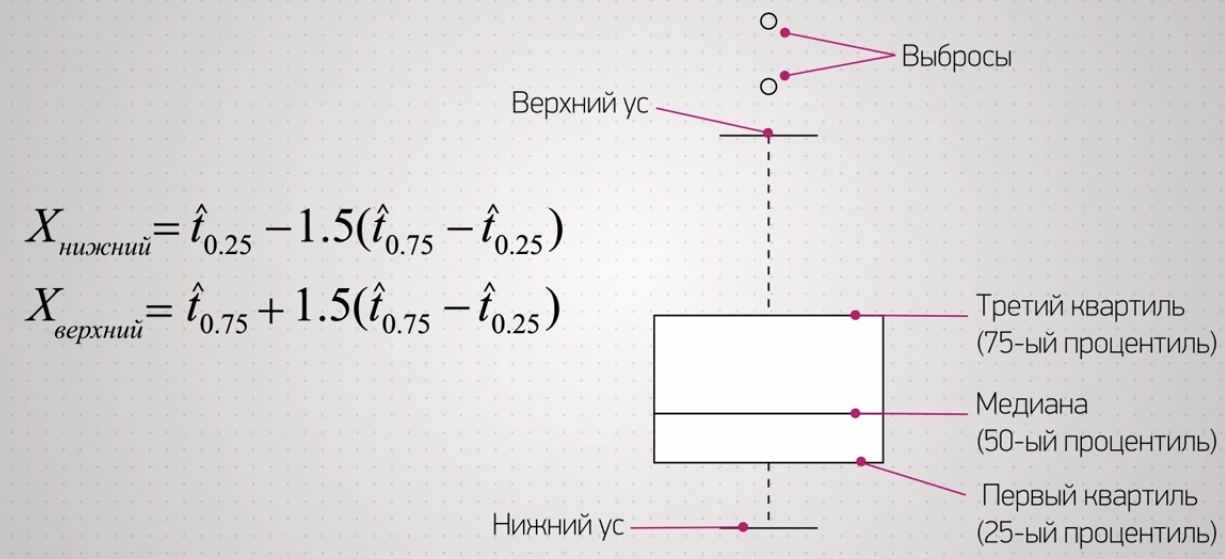

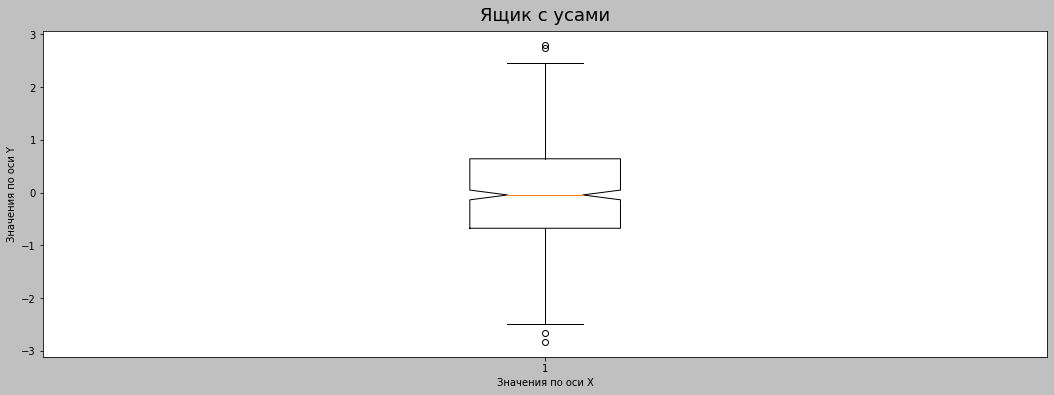

In [ ]:
plt.figure(figsize=(18,6),facecolor='silver')
plt.xlabel('Значения по оси X')
plt.ylabel('Значения по оси Y')


plt.title('Ящик с усами', fontsize=18, pad=10)

box_x = np.random.normal(0, 1, 500)
plt.boxplot(box_x, notch=True) # notch - доверительный интервал вокруг медианы
None

**Q-Q plot** – показывает насколько выборочное значение соответствует нормальному распределению, линия – идеальное нормальное распределение.</br>


<h1>Меры центральной тенденции<h1>

**Мода(mode)** – значение признака, которое встречается максимально часто.

In [ ]:
data_first = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9, 1, 2] # Набо значений распределения

count_values = {} # Словарь для заполнения
max_count = 1
mode_element = data_first[0]

# Получим словарь, заполненный значениями количества встреч уникального значения из data_first
for i in data_first:
    count_values[i] = count_values.get(i,0)+1 # Метод get() - возвращает второе значение, если первого изначально нет в словаре
    if count_values[i] > max_count:
        max_count = count_values[i]
        mode = i
print(f'Мода = {mode}')

Мода = 1


In [ ]:
# Специальная функция из пакета statistic
data_first = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9, 1, 2]
mode_statistics = statistics.mode(data_first)
print(f'Мода = {mode_statistics}')

Мода = 1


**Медиана (median)** – значение признака, которое делит упорядоченное множество данных пополам.

In [ ]:
data_first = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9, 1, 2]

def calculate_median(array): # Функция для нахождения медианы
    array = sorted(array)
    average_of_array = len(array) // 2
    if len(array) % 2 == 0:
        median = (array[average_of_array-1]+array[average_of_array]) / 2
    else:
        median = array[average_of_array]
    return median

median = calculate_median(data_first)
print(f'Медиана = {median}')



Медиана = 4.0


In [ ]:
# Специальная функция из пакета statistic
data_first = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9, 1]
median_statistics = statistics.median(data_first)
print(f'Медиана = {median_statistics}')

Медиана = 5


**Среднее значение (mean)** – сумма всех значений признака, деленная на количество измеренных значений.

$M_x = \frac{1}{n}\sum_{i=1}^n x_i $


In [ ]:
data_first = [6, 5, 2, 7, 3, 9, 3, 8, 5, 9, 1, 2]
mean = sum(data_first)/len(data_first)
print(f'Среднее значение = {mean}')

Среднее значение = 5.0


In [ ]:
# Специальная функция из пакета statistic
mean_statistics = statistics.mean(data_first)
print(f'Среднее значение = {mean_statistics}')

Среднее значение = 5


<span style="color: green; font-weight: bold; font-size:12pt">Обозначения:</span>

$M_x$ - среднее значение генеральной совокупности<br/>
$X_{ср}$ - среднее значение выборки.<br/>



**Свойства среднего:**<br/>
+ $M_{x+c} = M_x + C$<br/>
+ $M_{x*c} = M_x * C$<br/>
+ $\sum_{i=1}^n (x_i - M_x) = 0$

<h1>Меры изменчивости<h1>

**Размах (range)** – разность максимального и минимального значения.

In [ ]:
data_first = [6, 5, 2, 7, 3, 9, 3, 8, 5, 9, 1, 2]
range_data = max(data_first) - min(data_first)
print(f'Размах = {range_data}')

Размах = 8


**Дисперсия (variance)** – средний квадрат отклонений индивидуальных значений признака от их средней величины.
</br>
 + $D_x = \sum_{i=1}^n \frac{(x_i - x_{ср})^2}{n - 1}$


In [ ]:
data_first = [6, 5, 2, 7, 3, 9, 3, 8, 5, 9, 1, 2]
deviation_sum_of_data = 0

for x_i in data_first:
    deviation_sum_of_data += (x_i - mean)**2

variance = deviation_sum_of_data / (len(data_first) - 1)
print(f'Дисперсия = {variance}')



Дисперсия = 8.0


In [ ]:
# Специальная функция из пакета statistic
variance_statistics = statistics.variance(data_first)
print(f'Дисперсия = {variance_statistics}')

Дисперсия = 8


<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Среднеквадратическое отклонение</span> (standard deviation, стандартное отклонение) – среднее отклонение индивидуальных значений признака от их средней величины.

<center><strong><i>σ = √D<span style= "font-weight: bold; font-size: 7pt">x</span></i></strong></center><br></br>

In [ ]:
#python:
standard_deviation = variance**(1/2)


#import statistics
standard_deviation_statistics = statistics.stdev(data_first)
print(f'Среднеквадратическое отклонение = {standard_deviation} = {standard_deviation_statistics}')

Среднеквадратическое отклонение = 3.1754264805429417 = 3.1754264805429417


<span style="color: green; font-weight: bold; font-size:12pt">Обозначения:</span>

<i>D<span style= "font-weight: bold; font-size:7pt">x</span></i> – дисперсия генеральной совокупности,<br></br><br></br>
σ – станадртное отклонение генеральной совокупности,<br></br><br></br>
<i>sd<span style= "font-weight: bold; font-size:7pt">x</span></i> – стандартное отклонение выборки.

<br></br>

<span style="color: green; font-weight: bold; font-size: 12pt">Свойста дисперсии:</span><br></br>
+ <i>D<span style="font-weight: bold; font-size: 7pt">x+С</span> = D<span style="font-weight: bold; font-size: 7pt">x</span></i> ; <i>sd<span style="font-weight: bold; font-size: 7pt">x+С</span> = sd<span style="font-weight: bold; font-size: 7pt">x</span></i><br></br><br></br>
+ <i>D<span style="font-weight: bold; font-size: 7pt">x * С</span> = D<span style="font-weight: bold; font-size: 7pt">x</span> * C²</i> ; <i>sd<span style="font-weight: bold; font-size: 7pt">x * С</span> = sd<span style="font-weight: bold; font-size: 7pt">x</span> * C</i>

<center><span style="color: violet; font-weight: bold; font-size:14pt">Квантили распределения</span></center>

<span style="color: orange; font-weight: bold; font-size:12pt">Квантиль</span> – значение, которое заданная случайная величина не превышает с фиксированной вероятностью: <i>P(X ≤ x<span style= "font-weight: bold; font-size: 7pt">α</span>) ≥ α</i>

<span style="color: orange; font-weight: bold; font-size:12pt">Квартили</span> –  три значения признака, которые делят упорядоченное множество данных на четыре равные части.

<br></br><br></br>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Нормальное распределение</span></center>

![normalnoe_raspredelenie](pictures/normalnoe_raspredelenie.jpg)<br></br>

<span style = "color: orange; font-weight: bold; font-size:12pt">Нормальное распределение</span> унимодально, симметрично, отконения наблюдений от среднего подчиняются определенному вероятностному закону <strong><ins>(правило 3σ):</ins></strong>

+ <i>P(<span style = "text-decoration: overline">x</span> - σ < X < <span style = "text-decoration: overline">x</span> + σ) = 0.68</i><br></br><br></br>
+ <i>P(<span style = "text-decoration: overline">x</span> - 2σ < X < <span style = "text-decoration: overline">x</span> + 2σ) = 0.95</i><br></br><br></br>
+ <i>P(<span style = "text-decoration: overline">x</span> - 3σ < X < <span style = "text-decoration: overline">x</span> + 3σ) = 0.99</i>

<br></br>

<span style="color: orange; font-weight: bold; font-size:12pt">Стандартизация (Z-преобразование)</span> – преобразование полученных данных в стандартную Z-шкалу (Z-scores) со средним M<span style= "font-weight: bold; font-size:7pt">z</span> = 0 и дисперсией D<span style= "font-weight: bold; font-size:7pt">z</span> = 1.

Z-преобразование наглядно показывает, сколько стандартных отклонений между значениями (1 стандартное отклонение = 1 шагу на графике)

<br></br>
<center><strong><i>z<span style = "font-weight: bold; font-size:7pt">i</span> = (x<span style="font-weight: bold; font-size: 7pt">i</span> - <span style = "text-decoration: overline">x</span>) / sd<span style="font-weight: bold; font-size: 7pt">x</span></i></strong></center>

[Online-калькулятор для вычисления "z"](http://davidmlane.com/hyperstat/z_table.html)<br></br>
[Online-калькулятор для вычисления z, t, F и пр.](https://gallery.shinyapps.io/dist_calc/)

<br></br>
<ins>Вычисление "z" в Python:</ins><br></br>
![z_below](pictures/z_below.jpg)
"<strong>scipy.stats.norm.cdf()</strong>" - накопительная функция нормального распределения по известному "z". Т.е. сколько % от выборки расположены до/меньше заданной величины.

In [ ]:
#from scipy import stats 
print(f'На промежутке [-∞ ; 0,8σ] расположено {stats.norm.cdf(0.8):.2%} значений')

На промежутке [-∞ ; 0,8σ] расположено 78.81% значений


<br></br>
![z_above](pictures/z_above.jpg)
"<strong>scipy.stats.norm.sf()</strong>" - сколько % от выборки расположены после/больше заданной величины.

In [ ]:
#from scipy import stats 
print(f'На промежутке [0,8σ ; +∞] расположено {(stats.norm.sf(0.8)):.2%} значений')

На промежутке [0,8σ ; +∞] расположено 21.19% значений


<br></br>
![z_between](pictures/z_between.jpg)
"<strong>st.norm.cdf(z<span style= "font-weight: bold; font-size:7pt">2</span>) - st.norm.cdf(z<span style= "font-weight: bold; font-size:7pt">1</span>)</strong>" - сколько % от выборки расположены внтри заданного промежутка.

In [ ]:
#from scipy import stats 
print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(0.8) - stats.norm.cdf(-2)):.2%} значений')

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


<br></br>
![z_outside](pictures/z_outside.jpg)
"<strong>st.norm.cdf(z<span style= "font-weight: bold; font-size:7pt">1</span>) + st.norm.sf(z<span style= "font-weight: bold; font-size:7pt">2</span>)</strong>" - сколько % от выборки расположены за пределами заданного промежутка.

In [ ]:
#from scipy import stats 
print(f'На промежутке [-∞ ; -2σ]U[0,8σ ; +∞] расположено {(stats.norm.sf(0.8) + stats.norm.cdf(-2)):.2%} значений')

На промежутке [-∞ ; -2σ]U[0,8σ ; +∞] расположено 23.46% значений


<br></br>
"<strong>st.norm.ppf()</strong>" - вычисление значения "z" по известному значению накопительной функции распределения. Обратное значение от "st.norm.cdf()"

In [ ]:
#from scipy import stats 
print(f'st.norm.ppf(st.norm.cdf(0.8)) = {stats.norm.ppf(stats.norm.cdf(0.8)):.1f}')
print(f'st.norm.ppf(st.norm.cdf(-2)) = {stats.norm.ppf(stats.norm.cdf(-2)):.1f}')

st.norm.ppf(st.norm.cdf(0.8)) = 0.8
st.norm.ppf(st.norm.cdf(-2)) = -2.0


<br></br>

<span style="color: orange; font-weight: bold; font-size:12pt">Центральная предельная теорема.</span> При многократном повторении эксперимента выборочные средние симметричным образов распределяться вокруг среднего значения генеральной совокупности, а стандартное отклонение такого распределения выборочных средних – стандартная ошибка среднего: 

<br></br>
<center><strong><i>se<span style= "font-weight: bold; font-size:7pt">x</span> = σ / √n</strong> = sd<span style= "font-weight: bold; font-size:7pt">x</span> / √n</i>, при <i>n > 30 </i></center>

<br></br>

<span style="color: orange; font-weight: bold; font-size:12pt">Доверительный интервал для среднего</span>

\[μ - 1,96σ ; μ + 1,96σ\] – <strong>95%</strong> всех выборочных средних включили бы в данный интервал среднее генеральной совокупности μ

\[μ - 2,58σ ; μ + 2,58σ\] – <strong>99%</strong> доверительный интервал

In [ ]:
'''
М_mean(μ) - среднее в генеральной совокупности
sd - стандартное отклонение в выборке
n - количество выборочных значений
accuracy - точность интервала (может быть равен 95 или 99)
'''

#python:
def conf_interval_norm(М_mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    if accuracy == 95:
        di_1 = М_mean - se*1.96
        di_2 = М_mean + se*1.96
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
    elif accuracy == 99:
        di_1 = М_mean - se*2.58
        di_2 = М_mean + se*2.58
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
              
conf_interval_norm(7, 4, 100, 95)

Доверительный интервал для среднего: [6.216 ; 7.784]


<ins>Почему именно 1,96 из таблицы:</ins>

![doveritelnyi_interval](pictures/doveritelnyi_interval.jpg)

<br></br>

<ins>Расчитаем константу 1,96 с помощью функции в Python:</ins>

In [ ]:
#from scipy import stats 
print(stats.norm.ppf(0.025))
print(stats.norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


<br></br><center><span style ="color: violet; font-weight: bold; font-size:14pt">Идея статистического вывода</span></center>

<span style ="color: orange; font-weight: bold; font-size:12pt">Нулевая гипотеза</span> (<i>H<span style = "font-weight: bold; font-size: 7pt">0</span></i>) – отсутствие значимых различий между средним значением выборки и средним значением генеральной совокупности.

<span style ="color: orange; font-weight: bold; font-size:12pt">Альтернативная гипотеза</span> (<i>H<span style = "font-weight: bold; font-size: 7pt">1</span></i>) – значимое отклонение между средним значением выборки и средним значением генеральной совокупности.

<strong>Ошибка 1 рода</strong> – приняли альтернативную гипотезу, хотя верна нулевая.

<strong>Ошибка 2 рода</strong> – приняли нулевую гипотезу, хотя верна альтернативная.

<br></br>
<span style ="color: orange; font-weight: bold; font-size:12pt"><i>p</i>-уровень значимости </span> – вероятность получения такого или еще более сильного отклонения от среднего значения, если верна <i>H<span style = "font-weight: bold; font-size: 7pt">0</span></i>. Чем меньше <i>p</i>, тем больше оснований отклонить нулевую гипотезу.

[Статья "Что такое p-value?"](http://datascientist.one/p-value/)

<br></br>
<ins>Чтобы вычислить <i>p</i>-уровень значимости для нормального распределения:</ins><br></br>
<strong>1.</strong> найти на сколько стандартных отклонений (величину "z") среднее из новой экспериментальной выборки отличается от предполагаемого среднего значения в генеральной совокупности: 

<br></br>
<center><strong>z = (<span style = "text-decoration: overline">x</span> - μ) / se</strong></center>

<br></br>
<strong>2.</strong> определить, какой процент значений находится на промежутке [-∞ ; -z]U[z ; +∞]

<strong>3.</strong> если полученное значение <i>p</i> < 0.05, принимаем <i>H<span style = "font-weight: bold; font-size: 7pt">1</span></i>, т.е. мы получили статистически значимое отклонение.

<br></br>
<ins>Вычислим <i>p</i>-уровень значимости для нормального распределения в Python:</ins>

In [ ]:
'''
x_mean - новое среднее
M_mean(μ) - среднее в генеральной совокупности
sd - стандартное отклонение в выборке
n - количество выборочных значений
'''

#python:
#from scipy import stats 
def calc_pvalue_norm(M_mean, x_mean, sd, n):
    se = sd/(n**(1/2))
    z = abs((x_mean-M_mean)/se)
    p = (1 - stats.norm.cdf(z))*2
    return p

print('p = {:.5f}'.format(calc_pvalue_norm(102, 98, 10, 64)))

p = 0.00137


<br></br><br></br>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Сравнение средних</span></center>

<br></br>
<center><span style ="color: violet; font-weight: bold; font-size:14pt">Распределение Стьюдента</span></center>

Если <span style="color:gray">число наблюдений невелико (<i>n < 30</i>) и</span> стандартное отклонение генеральной совокупности σ неизвестно, то используется распределение Стьюдента (t-distribution): унимодально, симметрично, но наблюдения с большей вероятностью попадают за пределы <i>±2σ</i> от <i>μ</i>, чем при нормальном распределении.

Форма распределения определяется числом степеней свободы (<i><strong>df = n-1</strong></i>, degrees of freedom). С увелечением <i>df</i> распределение стремится к нормальному.
    
<br></br>
<ins>Вычислим <i>p</i>-уровень значимости для распределения Стьюдента в Python:</ins>

In [ ]:
'''
x_mean - новое среднее
M_mean(μ) - среднее в генеральной совокупности
sd - стандартное отклонение в выборке
n - количество выборочных значений

accuracy - точность интервала (может быть равен 95 или 99)
'''

#python:
#from scipy import stats 
def calc_pvalue_t(M_mean, x_mean, sd, n):
    se = sd/(n**(1/2))
    t = abs((x_mean-M_mean)/se)
    df = n-1
    p = (1 - stats.t.cdf(t, df))*2
    return p

print('p = {:.5f}'.format(calc_pvalue_t(10, 10.8, 2, 25)))

# Доверительный интервал у соответствующего t - распределения:
def conf_interval_t(М_mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    df = n-1
    if accuracy == 95:
        di_1 = М_mean - se*stats.t.ppf(0.975, df)
        di_2 = М_mean + se*stats.t.ppf(0.975, df)
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
    elif accuracy == 99:
        di_1 = М_mean - se*stats.t.ppf(0.995, df)
        di_2 = М_mean + se*stats.t.ppf(0.995, df)
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
              
conf_interval_t(89.9, 11.3, 20, 95)

p = 0.05694
Доверительный интервал для среднего: [84.61143720745503 ; 95.18856279254499]



[Как кодировать t-тест студента с нуля в Python](https://www.machinelearningmastery.ru/how-to-code-the-students-t-test-from-scratch-in-python/)

<br></br>
<span style ="color: orange; font-weight: bold; font-size:12pt">t -критерий Стьюдента</span>, сравнение двух средних в двух выборках

<br></br>
<center><i><strong>H<span style = "font-size: 7pt">0</span> :</strong> M<span style = "font-weight: bold; font-size: 7pt">1</span> = M<span style = "font-weight: bold; font-size: 7pt">2</span> ; <strong>H<span style = "font-size: 7pt">1</span> :</strong> M<span style = "font-weight: bold; font-size: 7pt">1</span> ≠ M<span style = "font-weight: bold; font-size: 7pt">2</span></i></center>

<br></br>
<center><strong><i>df = n<span style = "font-weight: bold; font-size: 7pt">1</span> + n<span style = "font-weight: bold; font-size: 7pt">2</span> - 2</i></strong></center>

<br></br>
<center><strong><i>se = √<span style = "text-decoration: overline"> </span>(sd<span style = "font-weight: bold; font-size: 7pt">1</span>² / n<span style = "font-weight: bold; font-size: 7pt">1</span> + sd<span style = "font-weight: bold; font-size: 7pt">2</span>² / n<span style = "font-weight: bold; font-size: 7pt">2</span>)</i></strong></center>

<br></br>
<center><strong><i>t = (<span style = "text-decoration: overline">X</span><span style = "font-weight: bold; font-size: 7pt">1</span> - <span style = "text-decoration: overline">X</span><span style = "font-weight: bold; font-size: 7pt">2</span>) / se</i></strong></center>
 
<br></br>
<ins>Вычислим <i>p</i>-уровень значимости для сравнения двух средних в двух выборках в Python:</ins>

In [ ]:
'''
x1_mean - среднее в 1ой выборке
x2_mean - среднее во 2ой выборке
sd1 - стандартное отклонение в 1ой выборке
sd2 - стандартное отклонение в 2ой выборке
n1 - количество наблюдений в 1ой выборке
n2 - количество наблюдений во 2ой выборке
'''

#python:
#from scipy import stats 
def calc_pvalue_t2(x1_mean, x2_mean, sd1, sd2, n1, n2):
    se = math.sqrt(sd1**2/n1 + sd2**2/n2)
    t = abs((x1_mean-x2_mean)/se)
    #print(t)
    df = n1+n2-2
    p = (1 - stats.t.cdf(t, df))*2
    return p

print('p = {:.5f}'.format(calc_pvalue_t2(89.9, 80.7, 11.3, 11.7, 20, 20))) 

p = 0.01569


<span style ="color: green; font-weight: bold; font-size:12pt">Применимость критерия Стьюдента:</span>

1. <strong>Независимость каждого из наблюдений</strong><br></br> 
2. <strong>Гомогенность дисперсий</strong>, т.е. дисперсии в двух выборках приблизительно одинаковы.<br></br> 
<ins>Проверка:</ins> критерий Левана или критерий Фишера<br></br>
3. <strong>Нормальность распределения при <i>n < 30 </i></strong>
    
![treb_U](pictures/treb_U.jpg)
    
<br></br>
<span style ="color: green; font-weight: bold; font-size:12pt">Проверка на нормальность:</span>

 + Построить [график-гистаграмму](https://stepik.org/lesson/8082/step/3?unit=1361) или [график qq-plot](https://stepik.org/lesson/8082/step/4?unit=1361)\*(если наблюдений мало)
 + Тест Колмагорова-Смирнова и тест Шапиро-Уилка: если получаем <i>p</i>-уровень значимости больше 0.05, значит наша выборка значимо не отличается от нормальной.
<br/>

![normalnost'](pictures/normalnost'.jpg)
<br/>

![shapiro-wilk](pictures/shapiro-wilk.jpg)

<strong>Если распределение отличается от нормального используется Критерий Манна-Уитни</strong>. Он переводит все данные в ранговую шкалу. Такой критерий гораздо менее чувствителен к отклонениям от нормальности и может быть использован при наличии значительных выбросов в выборке.

<ins>Построение графиков для теста Шапиро-Уилка с рандомными значениями в Python:</ins>

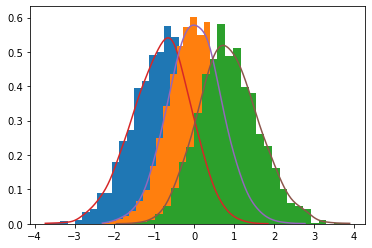

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density


mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

<br></br><br></br>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Однофакторный дисперсионный анализ</span></center>

ANOVA (ANalysis Of VAriance) позволяет сранивать средние значения в трех и более группах.

<br></br>
<center><i><strong>H<span style = "font-size: 7pt">0</span> :</strong> M<span style = "font-weight: bold; font-size: 7pt">1</span> = M<span style = "font-weight: bold; font-size: 7pt">2</span> = ... = M<span style = "font-weight: bold; font-size: 7pt">i</span> ; <strong>H<span style = "font-size: 7pt">1</span> :</strong> !(M<span style = "font-weight: bold; font-size: 7pt">1</span> = M<span style = "font-weight: bold; font-size: 7pt">2</span> = ... = M<span style = "font-weight: bold; font-size: 7pt">i</span>)</i></center>

<br></br>
Изменчивость имеющихся данных (<i>SS<span style = "font-weight: bold; font-size: 7pt">total</span></i>) может быть обусловлена изменчивостью внутри групп (<i>SS<span style = "font-weight: bold; font-size: 7pt">wg</span></i>) и изменчивостью между группами (<i>SS<span style = "font-weight: bold; font-size: 7pt">bg</span></i>):
+ Если большая часть общей изменчивости (<i>SS<span style = "font-weight: bold; font-size: 7pt">total</span></i>) обеспечивается благодаря изменчивости между группами (<i>SS<span style = "font-weight: bold; font-size: 7pt">bg</span></i>), это означает, что группы различаются между собой.
+ Если большая часть общей изменчивости (<i>SS<span style = "font-weight: bold; font-size: 7pt">total</span></i>) обеспечивается благодаря внутригрупповой изменчивости (<i>SS<span style = "font-weight: bold; font-size: 7pt">wg</span></i>), то это говорит о том, что группы не различаются.
+ Если межгрупповой показатель изменчивости (<i>SS<span style = "font-weight: bold; font-size: 7pt">bg</span></i>) значительно превышает внтуригрупповой (<i>SS<span style = "font-weight: bold; font-size: 7pt">wg</span></i>), то весьма вероятно что как минимум два средних значения отличаются друг от друга. 

<br></br>
<center><i><strong>SS<span style = "font-weight: bold; font-size: 7pt">total</span> = ∑(x<span style = "font-weight: bold; font-size: 7pt">ij</span> - M)²</strong> = SS<span style = "font-weight: bold; font-size: 7pt">bg</span> + SS<span style = "font-weight: bold; font-size: 7pt">wg</span></i></center>

<br></br>
<strong><center><i>SS<span style = "font-weight: bold; font-size: 7pt">bg</span> = ∑(M<span style = "font-weight: bold; font-size: 7pt">j</span> - M)²</i></center></strong>

<br></br>
<strong><center><i>SS<span style = "font-weight: bold; font-size: 7pt">wg</span> = ∑(x<span style = "font-weight: bold; font-size: 7pt">ij</span> - M<span style = "font-weight: bold; font-size: 7pt">j</span>)²</i></center></strong>

<br></br>
Усредненное значение межгрупповой суммы квадратов называется межгрупповым средним квадратом (межгрупповая дисперсия):

<br></br>
<strong><center><i>MS<span style = "font-weight: bold; font-size: 7pt">bg</span> = SS<span style = "font-weight: bold; font-size: 7pt">bg</span> / df<span style = "font-weight: bold; font-size: 7pt">bg</span> ; df<span style = "font-weight: bold; font-size: 7pt">bg</span> = m - 1</i></center></strong>

<br></br>
Внутригрупповой средний квадрат (внтуригрупповая дисперсия):

<br></br>
<strong><center><i>MS<span style = "font-weight: bold; font-size: 7pt">wg</span> = SS<span style = "font-weight: bold; font-size: 7pt">wg</span> / df<span style = "font-weight: bold; font-size: 7pt">wg</span> ; df<span style = "font-weight: bold; font-size: 7pt">wg</span> = N - m</i></center></strong>

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">F-критерий Фишера:</span>

<br></br>
<center><i><strong>F = ( SS<span style = "font-weight: bold; font-size: 7pt">bg</span> / (m - 1) ) / ( SS<span style = "font-weight: bold; font-size: 7pt">wg</span> / (N - m) )</strong> = MS<span style = "font-weight: bold; font-size: 7pt">bg</span> / MS<span style = "font-weight: bold; font-size: 7pt">wg</span></i></center>

<br></br>
<ins>Пример:</ins>

![anova_fisher](pictures/anova_fisher.png)

<br></br>
<ins>Расчет p-value для F-распределения:</ins>

[Distribution Calculator](https://gallery.shinyapps.io/dist_calc/)

![f_distribution](pictures/f_distribution.png)
    
<br></br>
<ins>Вычислим <i>p</i>-уровень значимости для распределения Фишера в Python:</ins>

In [ ]:
data_exmpl = [
    [3,1,2],
    [5,3,4],
    [7,6,5]
]

#python:
#from scipy import stats 

def calc_pvalue_f(array):
    
    SS_w = 0
    X_sum = 0
    N = 0
    for group in array:
        X_sum += sum(group)
        N += len(group)
        for i in group:
            SS_w += (i - sum(group)/len(group))**2
        
    X_mean = X_sum / N
    
    SS_bg = 0
    for group in array:
        SS_bg += len(group)*(sum(group)/len(group) - X_mean)**2
    
    m = len(array)
    F = ( SS_bg / (m-1) ) / ( SS_w / (N-m) ) 
    p = stats.f.sf(F, (m-1), (N-m))
    
    return p


print('p = {:.5f}'.format(calc_pvalue_f(data_exmpl)))

p = 0.00800


<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Однофакторный дисперсионный анализ в Python</span>

[Four Ways to Conduct One-Way ANOVA with Python](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

<ins>Расчёт F-критерия и p-значения, построение графика box-plot с использованием Pandas:</ins>

F = 8.03730248114399, p = 0.00015249722895229536


expr    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

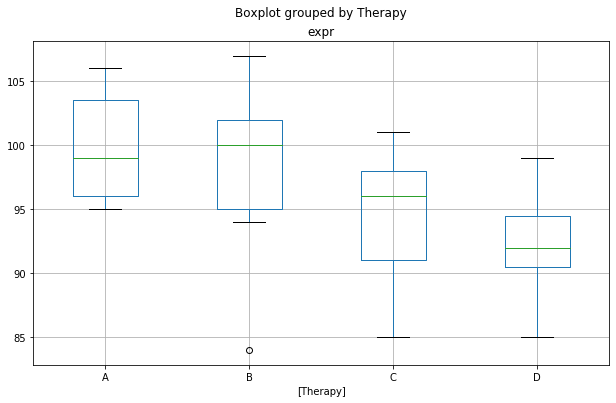

In [ ]:
#import pandas as pd
#from scipy import stats

data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

A_therapy = data_stepik[data_stepik["Therapy"] == "A"]["expr"]
B_therapy = data_stepik[data_stepik["Therapy"] == "B"]["expr"]
C_therapy = data_stepik[data_stepik["Therapy"] == "C"]["expr"]
D_therapy = data_stepik[data_stepik["Therapy"] == "D"]["expr"]

terapy_abcd = [A_therapy, B_therapy, C_therapy, D_therapy]

F, p = stats.f_oneway(A_therapy, B_therapy, C_therapy, D_therapy)
# Другой вариант записи:
# F, p = stats.f_oneway(*terapy_abcd)
# * - звёздочка означает, что мы передаём содержимое списка как набор аргументов (иначе был бы один аргумент - список)

print(f'F = {F}, p = {p}')


# Группируем по Therapy и рисуем boxplot для каждой группы
data_stepik[['Therapy', 'expr']].boxplot(by='Therapy', return_type='axes', figsize=(10, 6))

# [['Therapy', 'expr']] - указываем столбцы, по которым строим график. В данном конкретном случае можно удалить и ничего не изменится, т.к. столбцов в data всего два - 'Therapy' и 'expr'

# подробности синтаксиса ".boxplot()" - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.boxplot.html

<br></br><ins>Построение графика с использованием matplotlib:</ins>

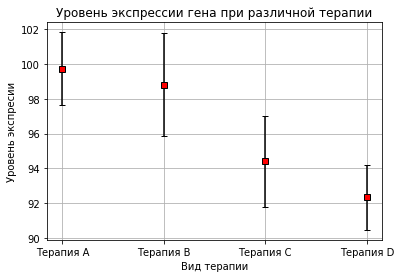

In [ ]:
#import pandas as pd
'''
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

A_therapy = data_stepik[data_stepik["Therapy"] == "A"]["expr"]
B_therapy = data_stepik[data_stepik["Therapy"] == "B"]["expr"]
C_therapy = data_stepik[data_stepik["Therapy"] == "C"]["expr"]
D_therapy = data_stepik[data_stepik["Therapy"] == "D"]["expr"]

terapy_abcd = [A_therapy, B_therapy, C_therapy, D_therapy]
'''

#import math
import matplotlib.pyplot as plt

names = ['Терапия A', 'Терапия B', 'Терапия C', 'Терапия D']

list_mean = [i.mean() for i in terapy_abcd]

list_se = [statistics.stdev(i)/math.sqrt(len(terapy_abcd)) for i in terapy_abcd]

plt.errorbar(x=names, y=list_mean, yerr=list_se, color="black", capsize=3, marker="s", markersize=6, mfc="red", mec="black", fmt = 'o')
# Первые 3 параметра (x, y, yerr) - обязательные. Остальные можно удалить, они лишь стилизация графика
# capsize - длина чёрточек на краях отрезков
# marker - форма средних значений (красных квадратов)
# markersize - размер средних значений (красных квадратов)
# fmt = 'o' - убрать линии соединения между точками средних значений
# др. подробности синтаксиса ".errorbar()" - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

plt.title('Уровень экспрессии гена при различной терапии')
plt.grid() # - отображает размерную сетку на графике
plt.xlabel('Вид терапии')
plt.ylabel('Уровень экспресии')
plt.show()

<br></br><br></br>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Множественное попарное сравнение в ANOVA</span></center>

Применяя однофакторный дисперсионный анализ, мы можем проверить нулевую гипотезу о том, что все сравниваемые группы происходят из одной генеральной совокупности, и следовательно их средние значения не различаются, т.е. 
<i>H<span style = "font-weight: bold; font-size: 7pt">0</span> : M<span style = "font-weight: bold; font-size: 7pt">1</span> = M<span style = "font-weight: bold; font-size: 7pt">2</span> = ... = M<span style = "font-weight: bold; font-size: 7pt">i</span></i>. Если нулевую гипотезу не удается отвергнуть при заданном уровне значимости (например, <i>α = 0.05</i>), в дальнейшем анализе, в принципе, нет необходимости. Но если нулевая гипотеза отвергается, мы делаем заключение о том, что средние значения сравниваемых групп значительно различаются (другими словами, изучаемый фактор оказывает существенное влияние на интересующую нас переменную). Это единственный вывод, который можно сделать при помощи дисперсионного анализа как такового. Однако какие именно группы отличаются друг от друга? Чтобы узнать это, необходимо выполнить попарные сравнения средних значений имеющихся групп. Критерий Стьюдента "в чистом виде" для таких сравнений неприменим в силу возникновения эффекта множественных сравнений. Поэтому при множественном попарном сравнении используются поправки.

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Поправка Бонферрони</span> (Bonferroni correction)

Если вероятность ошибки первого рода (получить значимые различия там, где их нет) возрастает пропорционально количеству групп, которые мы сравниваем между собой, то допустимый показатель <i>p</i>-уровня значимости (т.е. значение <i>p</i>, ниже которого различия считаются достоверными, обычно <i>α = 0.05</i>) нужно скорректировать на количество всех возможных комбинаций пар из имеющихся групп <i>С²<span style = "font-size: 5pt">m</span> = m! / (2! * (m-2)!) = m * (m-1) / 2</i><br></br> 
Т.е. новый допустимый показатель <i>p</i>-уровня значимости:

<center><i><strong>α = p / С²<span style = "font-size: 5pt">m</span></strong></i></center><br></br>

[Multi-comparison with Tukey’s test and the Holm-Bonferroni method](https://pythonhealthcare.org/2018/04/13/55-statistics-multi-comparison-with-tukeys-test-and-the-holm-bonferroni-method/)

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

'''
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
'''

MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])
comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')

print (comp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
     A      B 0.5815 0.5701    0.5701  False
     A      C 3.0759 0.0082    0.0329   True
     A      D 4.7318 0.0003    0.0019   True
     B      C 2.2164 0.0437    0.1312  False
     B      D 3.4596 0.0038    0.0192   True
     C      D 1.2058 0.2479    0.4958  False
--------------------------------------------


При наличии большого числа сравниваемых групп метод Бонферрони становится очень консервативным, часто не позволяя отвергнуть даже те гипотезы, которые со всей очевидностью должны быть отвергнуты. Для решения описанной проблемы (т.е. для выполнения большого числа попарных сравнений групповых средних без потери статистической мощности) используется <span style="color: orange; font-weight: bold; font-size:12pt">q-критерий Тьюки</span> (Tukey HSD), который представляет собой модифицированный критерий Стьюдента: <i>q = (<span style = "text-decoration: overline">X</span><span style = "font-weight: bold; font-size: 7pt">A</span> - <span style = "text-decoration: overline">X</span><span style = "font-weight: bold; font-size: 7pt">B</span>) / SE</i>

Когда все сравниваемые группы содержат одинаковое число наблюдений <i>m</i>: <i>SE = √<span style = "text-decoration: overline"> </span> (MS<span style = "font-weight: bold; font-size: 7pt">wg</span> / m)</i>

Когда сравниваемые группы содержат различное число число наблюдений <i>m</i>: <i>SE = √<span style = "text-decoration: overline"> </span> ( (MS<span style = "font-weight: bold; font-size: 7pt">wg</span> / 2) * (1 / m<span style = "font-weight: bold; font-size: 6pt">A</span> + 1 / m<span style = "font-weight: bold; font-size: 6pt">B</span>) )</i>

Благодаря тому обстоятельству, что в приведенных выше формулы стандартной ошибки входит внутригрупповая дисперсия MS<span style = "font-weight: bold; font-size: 7pt">wg</span>, обеспечивается контроль над групповой вероятностью ошибки первого рода. Именно это делает критерий Тьюки подходящим критерием для выполнения большого числа попарных сравнений групповых средних.

In [ ]:
#from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
'''
data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])
'''

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


Рассчитываются доверительные интервалы разности между средними значениями групп (<i><span style = "text-decoration: overline">X</span><span style = "font-weight: bold; font-size: 7pt">A</span> - <span style = "text-decoration: overline">X</span><span style = "font-weight: bold; font-size: 7pt">B</span></i>). Если такой интервал не включает в себя ноль, то можно отклонить нулевую гипотезу <i>H<span style = "font-weight: bold; font-size: 7pt">0</span></i> о равенстве двух средних.

Критерий Тьюки имеет те же <span style="color: green; font-weight: bold; font-size:12pt">условия применимости</span>, что и дисперсионный анализ:
1. <strong>нормальность распределения данных</strong>
2. (особенно важно!) <strong>однородность групповых дисперсий</strong> (подробнее см. [здесь](https://r-analytics.blogspot.com/2013/05/blog-post.html)). Для проверки используем тест Левина (если <i>p < 0,05</i>, то проверка пройдена)

Устойчивость к отклонению от этих условий, равно как и статистическая мощность критерия Тьюки, возрастают при одинаковом числе наблюдений во всех сравниваемых группах

<br></br><br></br>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Двухфакторный дисперсионный анализ</span></center>

<br></br>
Формула общей изменчивости:

<br></br>
<center><strong><i>SST = SSW + SSB<span style = "font-weight: bold; font-size: 7pt">A</span> + SSB<span style = "font-weight: bold; font-size: 7pt">B</span> + SSB<span style = "font-weight: bold; font-size: 7pt">A</span> * SSB<span style = "font-weight: bold; font-size: 7pt">B</span></i></strong></center>

<br></br>
[Three ways to do a two-way ANOVA with Python](http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/)

               Sum sq  df     Mean Sq          F      Pr(>F)
age        197.452754   1  197.452754    7.44984  0.00831345
dose        16.912241   1   16.912241   0.638094    0.427552
age:dose     0.927077   1    0.927077  0.0349784    0.852272
Residual  1590.257424  60   26.504290        NaN         NaN


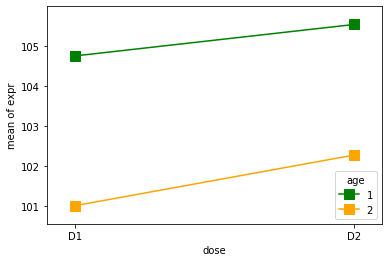

In [ ]:
#import pandas as pd
#from scipy import stats

data_stepik2 = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')

#График:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data_stepik2.dose, data_stepik2.age, data_stepik2.expr,colors=['green','orange'], markers=['s','s'], ms=10)

#Степени свободы
N =  len(data_stepik2.expr)
m_age = len(data_stepik2.age.unique())
m_dose = len(data_stepik2.dose.unique())

df_age = m_age - 1
df_dose = m_dose - 1
df_age_x_dose = df_age*df_dose 
df_w = N - m_age*m_dose

#Общее среднее
grand_mean = data_stepik2['expr'].mean()

#Суммы квадратов
SS_total = sum((data_stepik2.expr - grand_mean)**2)
SSB_age = sum([(data_stepik2[data_stepik2.age == i].expr.mean() - grand_mean)**2 for i in data_stepik2.age])
SSB_dose = sum([(data_stepik2[data_stepik2.dose == i].expr.mean() - grand_mean)**2 for i in data_stepik2.dose])

data_split_age = [data_stepik2[data_stepik2.age == i] for i in data_stepik2.age.unique()]
data_split_means = [[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in data_split_age]
SS_w = sum([sum((data_split_age[i].expr-data_split_means[i])**2) for i in range(len(data_stepik2.age.unique()))])

SSB_age_x_dose = SS_total - SSB_age - SSB_dose - SS_w

#Средние квадраты
MS_age = SSB_age / df_age
MS_dose = SSB_dose / df_dose
MS_age_x_dose = SSB_age_x_dose / df_age_x_dose
MS_w = SS_w / df_w

#F-значения
F_age = MS_age / MS_w
F_dose = MS_dose / MS_w
F_age_x_dose = MS_age_x_dose / MS_w

#p-значения
p_age = stats.f.sf(F_age, df_age, df_w)
p_dose = stats.f.sf(F_dose, df_dose, df_w)
p_age_x_dose = stats.f.sf(F_age_x_dose, df_age_x_dose, df_w)

#Собираем результаты в таблицу:
results = {'Sum sq' : [SSB_age, SSB_dose, SSB_age_x_dose, SS_w], 
           'df' : [df_age, df_dose, df_age_x_dose, df_w], 
           'Mean Sq': [MS_age, MS_dose, MS_age_x_dose, MS_w],
           'F':[F_age, F_dose, F_age_x_dose, 'NaN'], 
           'Pr(>F)' : [p_age, p_dose, p_age_x_dose, 'NaN']}

columns = ['Sum sq', 'df', 'Mean Sq', 'F', 'Pr(>F)']

aov_table1 = pd.DataFrame(results, columns=columns, index=['age', 'dose', 'age:dose', 'Residual'])

print(aov_table1)

                     sum_sq    df         F    PR(>F)
C(age)           197.452754   1.0  7.449841  0.008313
C(dose)           16.912241   1.0  0.638094  0.427552
C(age):C(dose)     0.927077   1.0  0.034978  0.852272
Residual        1590.257424  60.0       NaN       NaN


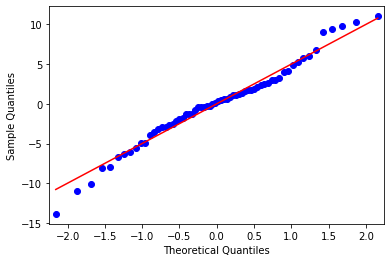

In [ ]:
#import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

'''
data_stepik2 = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')

'''
formula = 'expr~C(age)+C(dose)+C(age):C(dose)'
model = ols(formula, data_stepik2).fit()
aov_table2 = anova_lm(model, typ=2)

print(aov_table2)


#График:
#import matplotlib.pyplot as plt
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

<br></br><br></br>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Корреляция и регрессия</span></center>


<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Корреляция</span> – взаимосвязь двух факторов. М.б. положительная/прямая (значение коэф-та корреляции имеет знак '+') и отрицательная/обратная (значение коэф-та корреляции имеет знак '-'). Если значение коэф-та корреляции близко к нулю, то скорее всего, факторы не имеют взаимосвязи.

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Коэффициент ковариации</span> – мера линейной зависимости двух переменных:

<br></br>
<center><strong><i>cov<span style = "font-weight: bold; font-size: 5pt">XY</span> = ( ∑(x<span style = "font-weight: bold; font-size: 7pt">i</span> - <span style = "text-decoration: overline">X</span>)*(y<span style = "font-weight: bold; font-size: 7pt">i</span> - <span style = "text-decoration: overline">Y</span>) ) / (N - 1)</i></strong></center>

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Коэффициент корреляции (Пирсона)</span> –  показатель силы и направления взаимосвязи двух количественных переменных:

<br></br>
<center><strong><i>r<span style = "font-weight: bold; font-size: 7pt">xy</span> = cov<span style = "font-weight: bold; font-size: 5pt">XY</span> / (σ<span style = "font-weight: bold; font-size: 7pt">x</span> * σ<span style = "font-weight: bold; font-size: 7pt">y</span>)</i></strong> ∈ [-1 ; 1]</center>

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Коэффициент детерменации</span> –  показывает в какой степени дисперсия одной переменной обусловлена 'влиянием' другой переменной:

<br></br>
<center><strong><i>R² = (r<span style = "font-weight: bold; font-size: 7pt">xy</span>)²</i></strong> ∈ [0 ; 1]</center>

<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Проверка статистических гипотез:</span>

<br></br>
<center><i><strong>H<span style = "font-size: 7pt">0</span> :</strong> r<span style = "font-weight: bold; font-size: 7pt">xy</span> = 0 ; <strong>H<span style = "font-size: 7pt">1</span> :</strong> r<span style = "font-weight: bold; font-size: 7pt">xy</span> ≠ 0</i></center>

Для это найдём <i>t</i>-значение при числе степеней свобод <strong><i>df = N - 2</i></strong> (2 - т.к. мы работаем с двумя переменными <i>x</i> и <i>y</i>)

Прежде чем сделать вывод, важно помнить:

+ Положительная или отрицательная корреляция не говорит о причинно-следственной зависимости между переменными.
+ Корреляция между двумя переменными может обуславливаться существованием третьей переменной, влияющей на обе эти переменные.

<br></br>
<ins>Вычислим коэффициент корреляции в Python:</ins>

Коэффициент корреляции = -1.0


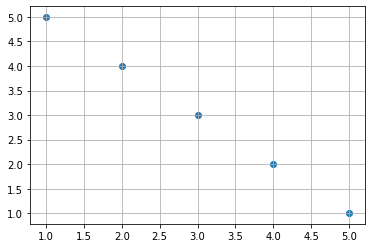

In [ ]:
#from scipy.stats import stats

array_x = [4, 5, 2, 3, 1]
array_y = [2, 1, 4, 3, 5]

r_xy = stats.pearsonr(array_x, array_y)[0]

print(f'Коэффициент корреляции = {r_xy}')
# pearsonr принимает два одномерных массива одинаковой длинны и возвращает кортеж из двух значений:
#  - коэффициент корреляции Пирсона
#  - p-уровень значимости


#График:
#import matplotlib.pyplot as plt
plt.scatter(array_x, array_y)
plt.grid() # - отображает размерную сетку на графике

<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Условия применимости коэффициента корреляции:</span>
1. Коэффициент корреляции применим если <strong>взаимосвязь линейна и монотонна</strong>
2. <strong>Нормальное распределение переменных</strong> (значительные выбросы могут негативно сказаться на значении коэффициента корреляции)

<br></br>
Если имеются значительные выбросы, можно попробовать использовать <span style="color: green; font-weight: bold; font-size:12pt">непараметрические аналоги коэффициента корреляции</span>, которые переходят от реальных значений переменных к ранжированным значениям.
+ Коффициент корреляции Спирмана 
+ Коффициент корреляции Кендалла

![spirmen](pictures/spirmen.jpg)

<br></br><br></br>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Одномерный регрессионный анализ</span></center>

<br></br>
Одномерный регрессионный анализ (простая линейная регрессия) применяется для исследования взаимосвязи двух количественных переменных (независимая переменная –  предиктор и зависимая переменная –  критериальная). Изучает как одна переменная определяет/позволяет предсказать другую переменную.

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Линия регрессии</span> (линия тренда) задается уравнением:

<br></br>
<center><strong><i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * x</i></strong> ,</center>

где <i>b<span style = "font-weight: bold; font-size: 7pt">0</span></i> – свободный член (intercept), который отвечает за значение <i>y</i>, где линия пересечет ось <i>OY</i> ; b<span style = "font-weight: bold; font-size: 7pt">1</span> – угловой коэффицент (slope), задаёт угол наклона между осью <i>OX</i> и графиком.

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Метод наименьших квадратов</span> – метод нахождения оптимальных параметров линейной регресии, таких, что сумма квадратов ошибок (остатков) была минимальна. 
<strong>Остаток</strong> - расстояние от реального значения до предсказаннного значения, лежащего на прямой.


Необходимо подобрать <i>b<span style = "font-weight: bold; font-size: 7pt">0</span></i> и <i>b<span style = "font-weight: bold; font-size: 7pt">1</span></i> так, чтобы линия максимально адекватно отображала связь данных переменных.

![mnk](pictures/mnk.png)

<br></br>
<center><strong><i>b<span style = "font-weight: bold; font-size: 7pt">1</span> = (sd<span style = "font-weight: bold; font-size: 7pt">y</span> / sd<span style = "font-weight: bold; font-size: 7pt">x</span>) * r<span style = "font-weight: bold; font-size: 7pt">xy</span></i></strong></center>

<br></br>
<center><strong><i>b<span style = "font-weight: bold; font-size: 7pt">0</span> = <span style = "text-decoration: overline">Y</span> - b<span style = "font-weight: bold; font-size: 7pt">1</span> * <span style = "text-decoration: overline">X</span></i></strong></center>

<br></br>
Гипотеза о значимости взаимосвязи: 

<center><i><strong>H<span style = "font-size: 7pt">0</span> : </strong>b<span style = "font-weight: bold; font-size: 7pt">1</span> = 0 (т.к. r<span style = "font-weight: bold; font-size: 7pt">xy</span> = 0) ; <strong>H<span style = "font-size: 7pt">1</span> : </strong>b<span style = "font-weight: bold; font-size: 7pt">1</span> ≠ 0</i></center>

<br></br>
Для это найдём <i><strong>t = b<span style = "font-weight: bold; font-size: 7pt">1</span> / se</strong></i> при числе степеней свобод <strong><i>df = N - 2</i></strong>

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Коэффициент детерминации</span> – доля дисперсии зависимой переменной <i>Y</i>, объясняемая регресионной моделью.

<br></br>
<center><strong><i>R² = 1 - (SS<span style = "font-weight: bold; font-size: 7pt">res</span> / SS<span style = "font-weight: bold; font-size: 7pt">total</span>)</i></strong> ,</center>

где <i>SS<span style = "font-weight: bold; font-size: 7pt">res</span></i>–  (residuals) сумма квадратов остатков (расстояний до регрессионой прямой), а <i>SS<span style = "font-weight: bold; font-size: 7pt">total</span></i> –  общая изменчивость (сумма квадратов расстояний до прямой <i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> = <span style = "text-decoration: overline">Y</span></i>).
Таким образом,  означает, что почти вся изменчивость переменной объясняется нашей регрессионной моделью.

![deteR2](pictures/deteR2.png)

<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Условия применимости линейной регрессии:</span>

<strong>1. Линейная взаимосвязь <i>X</i> и <i>Y</i></strong>. Если зависимость на самом деле нелинейна, то предсказание будет ошибочно. 

<ins>Проверка:</ins> Построить Scatter plot (диаграмма рассеяния)

![lineynost](pictures/lineynost.png)

<span style="color: gray">
Пути ликвидации нелинейности:
 + Трансформация Тьюки (Tukey Ladder of Powers) – возведение <i>X</i> в степень, теряется интерпретируемость.
 + Логарифмическая трансформация (Log transformation) – взятие логарифма от <i>X</i> и/или <i>Y</i>, интерпретируемость коэффициента наклона <i>b<span style = "font-weight: bold; font-size: 7pt">1</span></i>:
    1. <i>(log Y = b<span style = "font-weight: bold; font-size: 7pt">0</span> * log X)</i> – на сколько процентов увеличится значение зависимой переменной при изменении зависимой переменной на 1%.
    2. <i>(log Y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * X)</i> – при единичном изменении переменной <i>X</i>, переменная <i>Y</i> в среднем изменяется на <i>100 * b<span style = "font-weight: bold; font-size: 7pt">1</span></i> процентов.
    3. <i>(Y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * X)</i>  – изменение на <i>1%</i> по <i>X</i> в среднем приводит к <i>0.01 * b<span style = "font-weight: bold; font-size: 7pt">1</span></i> изменению по переменной <i>Y</i>.
 + Трансформация Бокса-Кокса (Box-Cox transformation) – обычно используется для трансформации зависимой переменной в случае, если у нас есть ненормальное распределение ошибок и/или нелинейность взаимосвязи, а также в случае гетероскедастичности.

<br></br>
<strong>2. Независимость наблюдений.</strong>

Источники:
 + Повторные измерения (на разных уровнях независимой переменной): снижение чувствительности теста, искуственное увелечение мощности теста (псевдореплекация).
 + Повторные пробы (на одном и том же уровне независимой переменной): искажение результатов.
 + Кластерезация данных (нет повторных измерений, но данные взяты из нескольких гомогенных групп): искажение результатов.

<br></br>
<strong>3. Независимость предикторов.</strong> Отсутствие мультиколлинеарности – линейной зависимости между предикорами.
 + Абсолютная мультиколлинеарность – корреляция между двумя предикторами равна ±1.
 + Если мы хотим только предсказывать значения, то мультиколлинеарность не проблема.
 + Для выявления можно построить корреляционную матрицу.
 + VIF (Variance Inflation Factor) – показывает, насколько хорошо предиктор объясняется другими предикторами. Еси VIF > 10, то предиктор лучше исключить из модели. Квадртаный корень из VIF показывает, во сколько раз стала больше стандартная ошибка данного коэффициента, по сравнению с ситуацией, если он был независим от других предикторов.</span>
 
<br></br>
<strong>4. Нормальное распределение остатков</strong>.

<ins>Проверка:</ins> Построить график распределения остатков: Q-Q plot (график квантиль-квантиль) или Histogramm (гистограмма)

![norm_res2](pictures/norm_res2.png)

<br></br>
<strong>5. Гомоскедастичность</strong> – одинаковая изменчивость зависимой переменной на всех уровнях независимой переменной (постоянная изменчивость остатков). Т.е. ведут ли себя остатки одинаково относительно прямой <i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * x</i> на протяжении всего регресиионого анализа.

<ins>Проверка:</ins> Построить график распределения остатков Scatter plot (диаграмма рассеяния)

![norm_res](pictures/norm_res.png)


<span style="color: gray">Если мы построим регрессию, где зависимой переменной будет квадрат остатков модели <i>Y~X</i>, а независимой переменной будет предиктор <i>X</i>, и в этой модели окажется высокий и значимый <i>R²</i>, это означает, что в данных есть гетероскедастичность. <br></br>
<ins>Проверка:</ins> Тест Бройша — Пагана (Breusch-Pagan test), тест Уайта (White test).</span>

<br></br>
<span style="color: gray"><strong>6. Отсутствие автокорреляции остатков.</strong></span>

<br></br>
<ins>Практический пример одномерной регрессии в Python:</ins>

        state  metro_res  white  hs_grad  poverty  female_house
0     Alabama       55.4   71.3     79.9     14.6          14.2
1      Alaska       65.6   70.8     90.6      8.3          10.8
2     Arizona       88.2   87.7     83.8     13.3          11.1
3    Arkansas       52.5   81.0     80.9     18.0          12.1
4  California       94.4   77.5     81.1     12.8          12.6


          N       Mean    St.Dev   Min   Max
poverty  64  11.349020  3.099185   5.6  18.0
hs_grad  64  86.011765  3.725998  77.2  92.1


Коэффициент корреляции = -0.7468582531582506


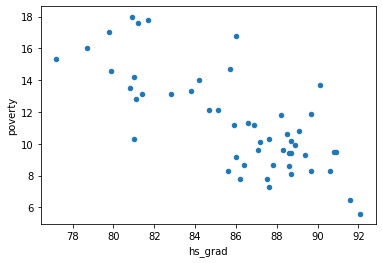

In [ ]:
#import pandas as pd

data_stepik3 = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
print(data_stepik3.head())
print()
print()

# Проверим линейность взаимосвязи X и Y графиком Scatter plot:
# import matplotlib.pyplot as plt
data_stepik3.plot.scatter('hs_grad','poverty')


# Вычислим основные показатели для АД:

x_array = data_stepik3.hs_grad
y_array = data_stepik3.poverty

# Средние:
x_mean = x_array.mean()
y_mean = y_array.mean()

# Стандартные отклонения:
#import statistics
x_stdev = statistics.stdev(x_array)
y_stdev = statistics.stdev(y_array)

# Минимальные и максимальные значения:
x_min = x_array.min()
y_min = y_array.min()

x_max = x_array.max()
y_max = y_array.max()

#Собираем результаты в таблицу:
result = {'N': [N, N], 'Mean' : [y_mean, x_mean], 'St.Dev':[y_stdev, x_stdev], 'Min' : [y_min, x_min], 'Max' : [y_max, x_max]}
columns = ['N', 'Mean', 'St.Dev', 'Min', 'Max']
result_table = pd.DataFrame(result, columns=columns, index=['poverty', 'hs_grad'])
print(result_table)

# Коэффициенты ковариации и корреляции:
N = len(data_stepik3)
cov_xy = sum([(x_i - x_mean)*(y_i - y_mean) for x_i, y_i in zip(x_array, y_array)]) / (N - 1)
r_xy = cov_xy/(x_stdev*y_stdev)
'''
Другой способ поиска коэф.корреляции:
#from scipy import stats
r_xy = stats.pearsonr(x_array, y_array)[0]
'''
print()
print()
print(f'Коэффициент корреляции = {r_xy}')

<ins>Линейная регрессия с библиотекой statsmodels</ins> ([Ссылка: Линейная регресиия в Python различными библиотеками](https://github.com/Bronnikoff/ML/blob/master/3_less/lesson_3.Linear_models.ipynb))

In [ ]:
import statsmodels.formula.api as smf

# линейная регрессия
model = smf.ols('poverty~hs_grad',data=data_stepik3)
fitted = model.fit()

# коеффиценты
fitted.params

# выкладка по модели
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Tue, 05 May 2020   Prob (F-statistic):           3.11e-10
Time:                        14:17:15   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

![linear](pictures/linear.jpg)

<br/><br/>
<ins>График регресионной прямой с использованием matplotlib</ins>

                y = 64.78 + (-0.62)*x


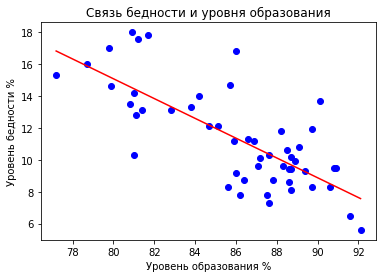

In [ ]:
# Уравнение регрессии:
# Коэффициенты линенйной регресии:
b1 = y_stdev / x_stdev * r_xy
b0 = y_mean - b1 * x_mean


print(f'                y = {b0:.2f} + ({b1:.2f})*x')

# График регрессионной прямой:
#import matplotlib.pyplot as plt
x_values = np.linspace(x_min, x_max, 10) # массив из 10 значений от x_min до x_max
y_values = b0 + b1 * x_values

plt.plot(x_array,y_array,'ob') # Расставляем точки
plt.plot(x_values, y_values,'r') # Рисуем линию
plt.title("Связь бедности и уровня образования")
plt.xlabel("Уровень образования %")
plt.ylabel("Уровень бедности %")
plt.show()

<ins>Вывод:</ins>
+ Т.к. <i>p-value < 0.05 </i>, мы отклоняем нулевую гипотезу о том, что нет взаимосвязи между уровнем бедности и уровнем среднего образования.
+ В штате, где уровень людей со средним образованием будет равен нулю, будет 64.78%(<i>=b<span style = "font-weight: bold; font-size: 7pt">0</span></i>) людей, проживающих за чертой бедности.
+ С каждым 1% увеличения людей, имеющих среднее образование, количество людей, проживающих в бедности уменьшается на 0.62% (<i>=b<span style = "font-weight: bold; font-size: 7pt">1</span></i>).
+ Практически 56% (<i>=R²</i>) изменчивости нашей зависимой переменной объясняется нашей моделью.
+ Линия тренда <i>y = 64.78 - 0.62 * x</i> позволяет предсказывать значения <i>y(∧)</i> по интересующей нас <i>x</i>. <i>(Бедность(∧) = 64.78 - 0.62 * Образование)</i>


<br></br>
<ins>Проверим остатки:</ins>
![res_exmpl](pictures/res_exmpl.png)
    
В целом требования гомоскедастичности и нормальности распределения остатков выполнено (хотя и присутствуют заметные положительные отклонения от нуля)

<br></br><br></br>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Многофакторный регрессионный анализ</span></center>

<br></br>
Множественная линейная регрессия позволяет исследовать влияние сразу нескольких независимых переменных на одну зависимую переменную (что в некоторых случаях позволяет вывести, так называемую, формулу счастья): 

<br></br>
<center><strong><i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * x<span style = "font-weight: bold; font-size: 7pt">1</span> + ... + b<span style = "font-weight: bold; font-size: 7pt">n</span> * x<span style = "font-weight: bold; font-size: 7pt">n</span></i></strong></center>

<br></br>
При двухфакторной линейной регресии в качестве остатков выступает не расстояние до прямой линии <i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * x</i>, а расстояние до плоскости (проекции на плоскость) <i>y = b<span style = "font-weight: bold; font-size: 7pt">0</span> + b<span style = "font-weight: bold; font-size: 7pt">1</span> * x<span style = "font-weight: bold; font-size: 7pt">1</span> + b<span style = "font-weight: bold; font-size: 7pt">2</span> * x<span style = "font-weight: bold; font-size: 7pt">2</span></i>

<br></br>
<ins>3D-визуализация зависимости бедности от hs_grad и metro_res с добавлением плоскости нашей регрессионной модели (Python):</ins>

Text(0.5, 0, 'poverty')

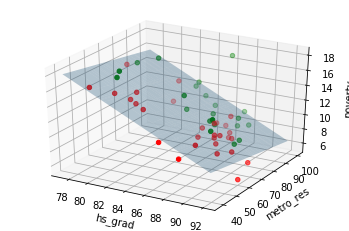

In [ ]:
#import statsmodels.formula.api as smf
#import pandas as pd
from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt
#import numpy as np

# %matplotlib notebook - раскомментировать, чтобы повертеть 3D-график

'''
data_stepik3 = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
'''

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data_stepik3).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data_stepik3.hs_grad.sort_values()
y = data_stepik3.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data_stepik3[data_stepik3['poverty'] < f(data_stepik3['hs_grad'], data_stepik3['metro_res'])]
data_above_serf = data_stepik3[data_stepik3['poverty'] >= f(data_stepik3['hs_grad'], data_stepik3['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

<br></br>
<span style="color: orange; font-weight: bold; font-size:12pt">Исправленный R²</span> (adjusted R-squared) – скорректированный коэффициент детерменации. Рассчитывается при включении в модель дополнительных независимых переменных.

<br></br>
<ins>Практический пример множественной регрессии в Python:</ins>

In [ ]:
data_stepik3.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [ ]:
#import statsmodels.formula.api as smf

'''
data_stepik3 = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
'''

# create a fitted model with all three features
lm = smf.ols(formula='poverty ~ metro_res + white + hs_grad + female_house', data=data_stepik3).fit()

# print the coefficients
lm.params

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.88e-10
Time:                        14:17:16   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

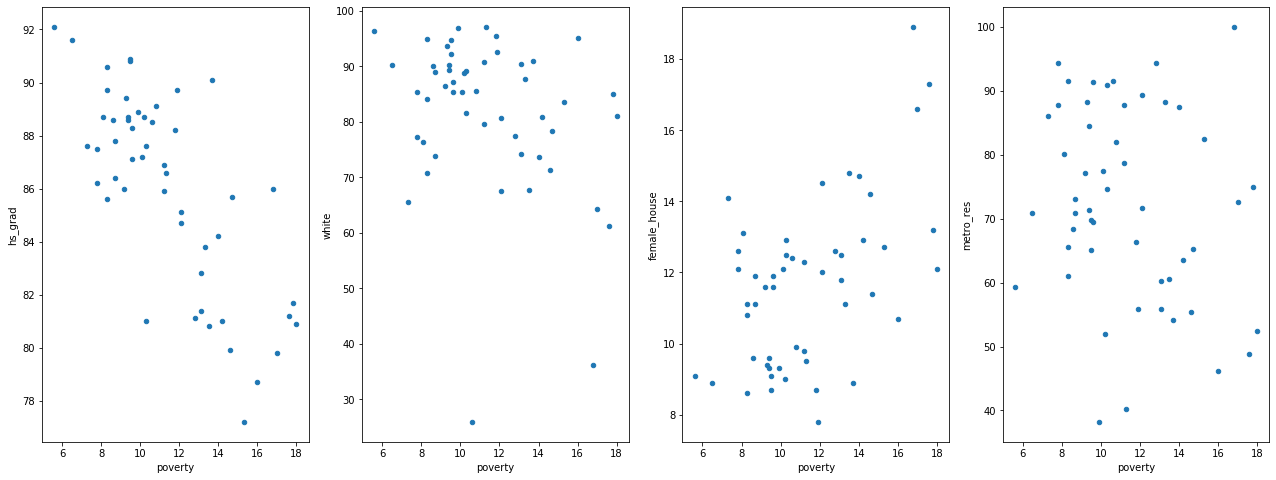

In [ ]:
# Визуализация с помощью графиков:
#import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, sharey=False)
data_stepik3.plot(kind = 'scatter', x = 'poverty', y = 'hs_grad', ax=axs[0], figsize=(22,8))
data_stepik3.plot(kind = 'scatter', x = 'poverty', y = 'white', ax=axs[1])
data_stepik3.plot(kind = 'scatter', x = 'poverty', y = 'female_house', ax=axs[2])
data_stepik3.plot(kind = 'scatter', x = 'poverty', y = 'metro_res', ax=axs[3])

<ins>Вывод:</ins>
+ Уравнение регрессии: <i>Бедность(poverty) = 66.4765 + (-0.0563)\*metro_res + (-0.0481)\*white + (-0.5547)\*hs_grad + 0.0505\*female_house</i>
+ В штате, где уровень людей со всеми исследуемыми предикторами (независимыми переменными) будет равен нулю, будет 66.4765%(<i>=b<span style = "font-weight: bold; font-size: 7pt">0</span></i>) людей, проживающих за чертой бедности. 
+ Т.к. мы получили <i>p-value &lt; 0.05 </i> только для двух факторов: проживание в столичной области (metro_res) и уровень образования(hs_grad). То делаем вывод, что только эти факторы имеют статистически значимую взаимосвязь с исследуемой зависимой переменной - бедностью населения (poverty)  
+ С каждым 1% увеличения людей, имеющих среднее образование, количество людей, проживающих в бедности уменьшается на 0.5547%
+ С каждым 1% увеличения людей, проживающих в столичной области, количество людей, проживающих в бедности уменьшается на 0.0563%     
+ 61% (<i>=Adj. R-squared</i>) изменчивости нашей зависимой переменной объясняется нашей моделью.

<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Требования к данным при многофакторной регресии:</span>
    
<strong>1. Линейная зависимость переменных</strong>

<strong>2. Нормальное распределение остатков</strong>

<strong>3. Гомоскедаcтичность</strong>

<strong>4. Нормальное распределение переменных</strong> (желательно)

<strong>5. Проверка на мультиколлинеарность</strong>. 

Мультиколлинеарность - очень сильная взаимосвязь между какими-то из предикторов (независимых переменных). Если две переменные очень сильно взаимосвязаны, то достаточно только одной из них, чтобы хорошо объяснить зависимую переменную.

![multicollinear](pictures/multicollinear.jpg)

<ins>Проверка на мультиколлинеарность в Python:</ins>

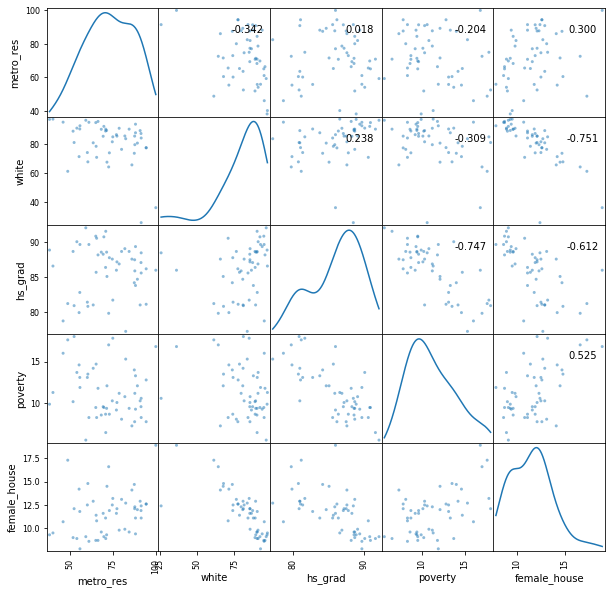

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np

'''
data_stepik3 = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
'''

axes = pd.plotting.scatter_matrix(data_stepik3, figsize=(10,10), diagonal='kde', grid=True)
data_corr = data_stepik3.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %data_corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Выбор наилучшей модели</span>

Из вышерасположенных графиков мы видим, что переменная female_house сильно коррелирует со всеми переменными, это даёт повод задуматься, а не лучше ли её убрать.

In [ ]:
# Найдём такой набор фичей, что R-squared максимальна
feats = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберём все сочетания переменных
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()          
brute_force(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = smf.ols(formula='poverty ~ ' + formula, data=data_stepik3).fit()
    print(f'{lm.rsquared_adj:.2}', formula)
    
print()
print('Вывод: сочетание "white + metro_res + hs_grad" даёт наилучший результат. Т.к. Adj.R-squared наибольшее и = 0.62')

0.61 female_house + hs_grad + metro_res + white
0.58 hs_grad + metro_res
0.39 female_house + metro_res + white
0.6 female_house + hs_grad + metro_res
0.62 hs_grad + white + metro_res
0.62 hs_grad + metro_res + white
0.4 female_house + metro_res
0.56 hs_grad + white
0.077 white
0.17 metro_res + white
0.55 female_house + hs_grad
0.55 female_house + hs_grad + white
0.55 hs_grad
0.17 white + metro_res
0.39 female_house + white + metro_res
0.022 metro_res
0.26 female_house
0.26 female_house + white

Вывод: сочетание "white + metro_res + hs_grad" даёт наилучший результат. Т.к. Adj.R-squared наибольшее и = 0.62


<br></br>
<span style="color: green; font-weight: bold; font-size:12pt">Итоговая модель</span>

In [ ]:
 #import statsmodels.formula.api as smf

'''
data_stepik3 = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')
'''

# create a fitted model with all three features
lm = smf.ols(formula='poverty ~ metro_res + white + hs_grad', data=data_stepik3).fit()

# print the coefficients
lm.params

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 05 May 2020   Prob (F-statistic):           1.55e-10
Time:                        14:17:19   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.000      55.869      81.575
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ins>Вывод:</ins>
+ Уравнение регрессии: <i>Бедность(poverty) = 68.722 + (-0.0555)\*metro_res + (-0.0533)\*white + (-0.5697)\*hs_grad</i>
+ В штате, где уровень людей со всеми исследуемыми предикторами (независимыми переменными) будет равен нулю, будет 68.722%(<i>=b<span style = "font-weight: bold; font-size: 7pt">0</span></i>) людей, проживающих за чертой бедности. 
+ Т.к. мы получили <i>p-value &lt; 0.05 </i> для всех факторов: проживание в столичной области (metro_res), уровень образования(hs_grad), процент белого населенния(white). То делаем вывод, что все эти факторы имеют статистически значимую взаимосвязь с исследуемой зависимой переменной - бедностью населения (poverty)  
+ Увеличив людей, имеющих среднее образование на 1%, количество людей, проживающих в бедности уменьшается на 0.5697%
+ Увеличив людей, проживающих в столичной области на 1%, количество людей, проживающих в бедности уменьшается на 0.0555%
+ Увеличив процент белого населения на 1%, количество людей, проживающих в бедности уменьшается на 0.0533%
+ 61.8% (<i>=Adj. R-squared</i>) изменчивости нашей зависимой переменной объясняется нашей моделью.

<br></br>
<ins>Проверим остатки:</ins>

![res_exmpl2](pictures/res_exmpl2.jpg)

<br/><br/><br/>
<center><span style="color:black; font-weight: bold; font-size:24pt">Основы статистики. Часть 2</span></center>
<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Анализ номинативных данных</span></center>
<br/>

<center><span style="color: violet; font-weight: bold; font-size:14pt">Критерий χ²-Пирсона</span></center>

**H<span style = "font-size: 7pt">0</span>:** Распределение частот не отличимо от ожидаемого<br/>
**H<span style = "font-size: 7pt">1</span>:** Распределение частот отличимо от ожидаемого<br/>
**Задача:** Определить, насколько статичстически значимы различия между ожидаемыми и эмпирическими значениями

<br/>
<span style="color: orange; font-weight: bold; font-size:12pt">Расстояние Хи-квадрат:</span>
<br/><br/>
<center><strong><i>χ² = ∑( (O<span style = "font-weight: bold; font-size: 7pt">i</span> - E<span style = "font-weight: bold; font-size: 7pt">i</span>)² / E<span style = "font-weight: bold; font-size: 7pt">i</span> )</i></strong></center>

где значения <i>O<span style = "font-weight: bold; font-size: 7pt">i</span> (Observed)</i> - наблюдаемые частоты, <i>E<span style = "font-weight: bold; font-size: 7pt">i</span> (Expexted)</i> - ожидаемые частоты.

<br/>

![x2_rasstoyznie](pictures/x2_rasstoyznie.jpg)

<br/>
<span style="color: orange; font-weight: bold; font-size:12pt">Распределение <i>χ²</i> с <i>k</i> степенями свободы</span> (<i>k</i> - сумма слагаемых) — распределение суммы квадратов <i>k</i> независимых стандратных (со средним M<span style= "font-weight: bold; font-size:7pt">z</span> = 0 и дисперсией D<span style= "font-weight: bold; font-size:7pt">z</span> = 1) случайных величин, распределённых нормальным образом.

На графике видно, что отклонение от заданной точки до нуля (<i>χ²</i>) равняется гипотенузе прямоугольного треугольника со сторонами, равными значениям координат по осям <i>OX</i> и <i>OY</i>:

![dvum_raspr](pictures/dvum_raspr.jpg)

![x2_rasspr](pictures/x2_rasspr.jpg)

Чем больше число степеней свободы у распределения хи-квадрат, тем более симметричным становится такое распределение, и тем больше распределение Хи-квадрат стремится к нормальному.

[Почему df = N-1 ?](https://stepik.org/lesson/24814/step/10?unit=7105) <br/>
<span style="color: gray">При заданном количестве значений только <i>N-1</i> значений будут независимы, зная их все, последнюю <i>1</i> мы всегда можем предсказать, следовательно <i>1</i> значение всегда не независимо от других и его не следует учитывать.</span>

<span style="color: green; font-weight: bold; font-size:12pt">Расчёт p-value</span> - [Online-калькулятор для вычисления p-value](https://gallery.shinyapps.io/dist_calc/)

<br/>
<ins>Рассчитаем значение <i>χ²</i> и p-value в Python:</ins>

In [ ]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([18, 55, 27], f_exp=[25, 50, 25]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.3f}')

Хи-квадрат = 2.62, p = 0.270


<br/>
<ins>Какой процент наблюдений лежит в диапазоне:</ins>

In [ ]:
#from scipy import stats
chi2_down=stats.chi2.cdf(2 , 2) # - (нижняя граница диапазона, число степеней свободы)
chi2_up=stats.chi2.cdf(4 , 2) # - (верхняя граница диапазона, число степеней свободы)
# stats.chi2.cdf() - вероятность попасть в 95%, т.е. значение, обратное p-value (= 1 - p-value)

chi2_interval = chi2_up - chi2_down
print(f'В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит {chi2_interval:.1%} наблюдений.')

В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит 23.3% наблюдений.


<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Анализ таблиц сопряженности</span></center>

**H<span style = "font-size: 7pt">0</span>:** Распределение частот не отличимо от ожидаемого<br/>
**H<span style = "font-size: 7pt">1</span>:** Распределение частот отличимо от ожидаемого, иными словами: номинативные переменные взаимосвязаны между собой<br/>
**Задача:** Исследование наличия взаимосвязи между двумя номинативными переменными

<br/>

<span style="color: green; font-weight: bold; font-size:12pt">Расчёт ожидаемых значений:</span>

<br/>
<center><strong><i>f<span style = "font-weight: bold; font-size: 7pt">ij</span> = (f<span style = "font-weight: bold; font-size: 7pt">i</span> * f<span style = "font-weight: bold; font-size: 7pt">j</span>)/ N</i></strong></center>

где <i>f<span style = "font-weight: bold; font-size: 7pt">i</span></i> - сумма в строке, <i>f<span style = "font-weight: bold; font-size: 7pt">j</span></i> - сумма в столбце, <i>N</i> - количество наблюдений в выборке.

<br/>

![ozhid_znacheniya](pictures/ozhid_znacheniya.jpg)

Для поиска взаимосвязи между номинативными переменными, применяем критерий <i>χ²</i>-Пирсона, который проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого. И рассчитываем p-value со степенями свобод, равными:

<br/>
<center><strong><i>df = (n - 1) * (m - 1)</i></strong></center>

где <i>n</i> - количество столбцов таблицы, <i>m</i> - количество строк

<br/>
В теории распределение <i>χ²</i> непрерывно, тогда как вычисляемые значения всегда дискретны, в результате <i>H<span style = "font-size: 7pt">0</span></i> может отвергаться слишком часто. Чтобы скорректировать значение p-уровня значимости применяется <span style="color: orange; font-weight: bold; font-size:12pt">Поправка Йетса</span> на непрерывность. (Используется для анализа таблицы сопряженности два на два, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 5, но меньше 10).<br/>

<br/>
<center><strong><i>χ²<span style = "font-weight: bold; font-size: 7pt">Yates</span> = ∑( (|f<span style = "font-weight: bold; font-size: 5pt">O</span> - f<span style = "font-weight: bold; font-size: 5pt">E</span>| - 0.5)² ) / f<span style = "font-weight: bold; font-size: 5pt">E</span></i></strong></center>

где f<span style = "font-weight: bold; font-size: 5pt">O</span> - эмпирическое значение в ячейке, f<span style = "font-weight: bold; font-size: 5pt">E</span> - ожидаемое значение в ячейке

<br/>
<ins>Рассчитаем ожидаемые значения, число степеней свобод, значение <i>χ²</i> и p-value в Python:</ins>

In [ ]:
#from scipy import stats
observed_array = [ [18, 7], [6, 13] ]

chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
# 'correction=True' - поправка Йетса, работает по умолчанию при df=1, поэтому можно удалить из формулы и ничего не изменится

print(f'Хи-квадрат = {chi2_value:.3f} \np-value = {p_value:.3f} \ndf = {df_value}')
print(f'\nОжидаемые значения:\n{expected_array}')

Хи-квадрат = 7.114 
p-value = 0.008 
df = 1

Ожидаемые значения:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


<br/>
<span style="color: green; font-weight: bold; font-size:12pt">Интерпретретация остатков:</span>

Анализ остатков (разница между ожидаемыми и эмпирическими значениями) позволяет выявить, какие именно частоты значимо отклоняются от ожидаемых значений.

+ Если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

<br/>
<ins>Построим наглядный график в Python:</ins>

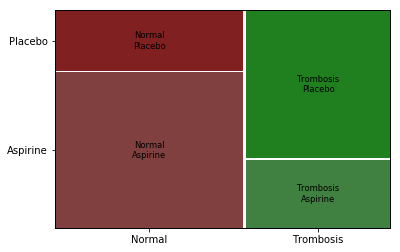

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
pill_data = {('Normal', 'Aspirine'): 18, 
             ('Normal', 'Placebo'): 7,
             ('Trombosis', 'Aspirine'): 6,
             ('Trombosis', 'Placebo'): 13
            }
# Значения 18, 7, 6, 13 являются входными значениями и соответсвуют таблице observed_array = [ [18, 7], [6, 13] ]

my_plot = mosaic(pill_data, gap=.009)

# Ширина прямоугольников соответствует количеству наблюдений
# Высота прямоугольников соответствует отклонению ожидаемых и наблюдаемых частот в этой ячейке

<br/>
<span style="color: green; font-weight: bold; font-size:12pt">Условия применимости критерий χ² при анализе таблиц сопряжённости:</span>

+ Все наблюдения независимы
+ Минимальное количество наблюдений в каждой из ячеек должно быть больше 5 (иначе нарушается предположение о нормальном распределении переменных)

В случае когда размер выборки очень маленький и наблюдений в каждой из ячеек недостаточно (меньше 5), используется <span style="color: violet; font-weight: bold; font-size:13pt">точный критерий Фишера</span>:

![tochniy_fisher](pictures/tochniy_fisher.jpg) 
[Как выводится эта формула](https://stepik.org/lesson/26447/step/3?unit=8328)

![tochniy_fisher_primer](pictures/tochniy_fisher_primer.jpg)

Почему не рассматриваются варианты 3,1 + 4,0? -> В тесте Фишера фиксированы и суммы по строкам, и суммы по столбцам.

<br/>

<ins>Расчёт p-value с применением точного критерия Фишера в Python:</ins>

In [ ]:
#from scipy import stats
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

print(p_value)

0.48571428571428527


<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Метод логистической регрессии</span></center>
<br/>
<span style="color: violet; font-weight: bold; font-size:14pt">Логистическая регрессия</span> используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).

Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных <i>p</i> и <i>(1 - p)</i>. <br/>
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

![log_regr](pictures/log_regr.jpg)

<span style="color: orange; font-weight: bold; font-size:12pt">Odds (шансы)</span> **= <i>p / (1 - p)</i>** - это отношение вероятности успеха <i>(p)</i> к вероятности неудачи <i>(1 - p)</i> , ∈ \[0; +∞)

<span style="color: orange; font-weight: bold; font-size:12pt">Логарифм шанса <i>(log odds)</i></span> = <i>logit (p)</i> , ∈ (-∞; +∞)

+ если <i>log odds > 0 </i>, то <i>p > 1 - p </i>
+ если <i>log odds < 0 </i>, то <i>p < 1 - p </i>

![log_shans](pictures/log_shans.png)

In [ ]:
#import math

# Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?
math.log(30/70)

# Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:
math.exp(-1) / (1 + math.exp(-1))

0.2689414213699951

<br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Модель без предикторов</span></center>

<br/>Модель без предикторов описывается уравнением: **<i>y = intercept</i>** (одному числу, без предикторов)

<span style="color: orange; font-weight: bold; font-size:12pt">Intercept</span> - натуральный логарифм шансов положительного исхода. И свободный член логистической регресии.

Т.е. мы хотим предсказать логарифм шансов, используя только одно число: **<i>log( p/(1-p) ) = intercept</i>**

<br/>

**H<span style = "font-size: 7pt">0</span>:** Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:
+ <i>p = 1 - p</i>;
+ <i>odds = 1</i>;
+ Логарифм шансов <i>logit(p) = 0</i> , т.е. logit(p) (он же intercept) имеет нормальное распределение со средним равным 0

<br/>

![intercept_only_model](pictures/intercept_only_model.jpg)

Интерпретация расчётной таблицы:
+ Estimate - значение intercept (логарифма шансов)
+ Полученная в расчётах стандартная ошибка (<i>se</i>) - это стандартное отклонение, которое имело бы нормальное распределение коэфициента intercept со средним равным 0
+ Тогда если разделить значение коэфициента intercept на стандартную ошибку, то получим <i>z-value</i> – расстояние до 0 в стандартных отклонениях.
+ Pr(>|z|) - значение <i>p-value</i>, т.е. вероятность получить такое или ещё более сильное отличие intercept от 0 при условии, что верна нулевая гипотеза

In [ ]:
'''
С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, 
что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. 
В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход), 
а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен -0.8472979. 
Сколько человек всё-таки сдало экзамен?
'''

def find_n_sdalo (logit_p, n_vsego):
    p = math.exp(logit_p) / (1 + math.exp(logit_p))
    n_sdalo = round(p * n_vsego)
    return n_sdalo

logit_p = -0.8472979
n_vsego = 50

find_n_sdalo (logit_p, n_vsego)

15

<br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Модель с одним номинативным предиктором</span></center>

Таблица зависимостей шансов выжить у мужчин и женщин:
![y_n_f_m](pictures/y_n_f_m.jpg)

<br/><i>odds_male</i> = 93 / 360 = 0.26
<br/><i>odds_female</i> = 197 / 64 = 3.08

**intercept** - натуральный логарифм шансов положительного исхода для женщин
<br/><i>log(odds_female)</i> = 1.12

**коэф-т при Х** - натуральный логарифм отношения шансов положительного исхода для мужчин и шансов для женщин (он же - разность логарифмов шансов)
<br/><i>odds_ratio = odds_male / odds_female</i>
<br/><i>log(odds_ratio) </i> = - 2.48
<br/>По свойству логарифмов: <i>log(odds_ratio) = log(odds_male) - log(odds_female)</i> 

![log_model_1x](pictures/log_model_1x.jpg)

Т.к. переменные Female и Male зависимы друг от друга (мультиколлинеарны), разумно в построении модели использовать только одну из них (любую, у нас выбраны женщины, просто по алфавиту), а вторую назначить значением intercept. Поэтому, смотрим, какой градации-предиктора нет среди коэффициентов, это и будет intercept

![ln_odds](pictures/ln_odds.jpg)
<br/><i>log(odds_female)</i> = 1.12 - 2.48 * Sex_Male = 1.12 - 2.48 * 0 = 1.12
<br/><i>log(odds_male)</i> = 1.12 - 2.48 * Sex_Male = 1.12 - 2.48 * 1 = - 1.35

<br/>Интерпетация таблицы, если значений зависимой переменной более двух:

![log_regr_1x-3](pictures/log_regr_1x-3.png)

<br/>В отличии от теста χ²-Пирсона, логистическая регрессия не только указала что две переменные взаимосвязаны, но указала шансы для разных градаций независимой переменной.

<br/>[Сколько предикторов наиболее удачно включитьв логистическую модель?](https://stepik.org/lesson/26555/step/10?unit=8403)

<br/><ins>Расчёт логистической модели с одним номинативным предиктором в Python:</ins>

In [ ]:
#import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

category_columns = { col: 'category' for col in ['Survived', 'Sex'] }  # приведение выбранных колонок к категориальному

data_titanic = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv', dtype=category_columns)
data_titanic = data_titanic[data_titanic.Age.notnull()]

# Зависимая переменная обычно обозначается как "Y" или "y"
Y = data_titanic.loc[:,'Survived'].cat.codes

# То о чем говорил преподаватель: колонку пол c двумя градациями нужно трансформировать в 2 колонки для каждого пола
X = sm.add_constant( data_titanic.loc[:,'Sex'].cat.codes )

#
# ВЫЧИСЛЯЕМ  
#
# Классическое представление результат-предиктор(ы), которое используется в классификаторах
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()

# Можно и так (кто привык к R)
glm_binom_rstyle = smf.glm(formula="Survived ~ Sex", data=data_titanic, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()


print( res.summary() )
print('\n\n')
print( res_rstyle.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Tue, 05 May 2020   Deviance:                       750.70
Time:                        14:17:20   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.144      7.814      0.0

<br/><br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Модель с двумя номинативными предикторами</span></center>

<br/>Таблицы зависимостей шансов выжить у мужчин и женщин в зависимости от класса:

![y_n_f_m_1_2_3](pictures/y_n_f_m_1_2_3.png)

На графике:

![gr_y_n_f_m_1_2_3](pictures/gr_y_n_f_m_1_2_3.jpg)


Интерпретация таблицы:

![tab_y_n_f_m_1_2_3](pictures/tab_y_n_f_m_1_2_3.jpg)

<br/>Уравнение регрессии:

<br/><center><i>ln(odds) = 3.3 - 3.7\*SexMale - 0.88\*PclassSecond - 3.46\*PclassThird - 0.42\*SexMale\*PclassSecond  + 2.15\*SexMale\*PclassThird</i></center> 

<br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Смешаная регрессионная модель</span></center>

Модель, в которой учитываются и количественные и номинативные переменные

![dif_regr](pictures/dif_regr.png)

<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Непараметрические методы</span></center>
<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">U-критерий Манна-Уитни</span></center>

<span style="color: gray">Непараметрический аналог <i>t</i>-критерия Стьюдента. Используется для оценки различий между двумя независимыми выборками, в которых признак измерен в метрической или ранговой шкале.</span>

[Видео на Stepik](https://stepik.org/lesson/26822/step/3?unit=8557)

Самым популярным непараметрическим критерием для сравнения двух групп является U-критерий Манна — Уитни. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает сумму рангов (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

Затем для каждой из выборок рассчитывается показатель:

![U_1](pictures/U_1.jpg)

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где 

![U_2](pictures/U_2.jpg)

что и позволяет нам рассчитать вероятность получить наблюдаемые или еще более выраженные различия суммы рангов.

**Разумно применять вместо t - теста:**

1. Распределения хотя бы в одной из выборок значительно отличается от нормального. 
2. Есть заметные выбросы в данных. 
3. В некоторых задачах мощность теста даже выше, чем t критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении). 

**Неразумно применять:**

1. Выборки разного размера, с различным направлением асимметрии.  

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Критерий Краскела-Уоллиса</span></center>

Если при сравнении трёх и более групп нарушаются требования и к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - критерий Краскела-Уоллиса.

![KruskalWallis_1](pictures/KruskalWallis_1.jpg)

![KruskalWallis_2](pictures/KruskalWallis_2.jpg)

<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Кластерный анализ и метод главных компонент</span></center><br/>

Метод кластерного анализа относится к группе методов "обучение без учителя". Это значит, что никто не знает правильного ответа на интересующий нас вопрос и нет никакой обратной связи.

**Постановка задачи:** Разбить данные на группы

<span style="color: orange; font-weight: bold; font-size:12pt">Кластерный анализ</span> - анализирует наблюдения (по строкам), и отвечает на вопросы, есть ли в данных подгруппы/кластеры испытуемых и сколько таких кластеров лучше выделить.

<span style="color: orange; font-weight: bold; font-size:12pt">Метод главных компонент</span> - анализирует наблюдения (по столбцам), и отвечает на вопрос можно ли сократить размерность данных, объединив некоторые из них в группы (интегративные переменные).

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Кластерный анализ методом k-средних</span></center>
<br/>

**Алгоритм метода k-средних:**
1. Сами решаем на сколько кластеров будем делить.
2. Случайно выбираем начальные позиции центроидов кластера.
3. Для каждого наблюдения определяем, к какому центроиду он ближе всего.
4. Обновим позиции центроидов (среднее по каждой переменной для группы).
5. Если принадлежности некоторых точек изменились, то пункт 4, иначе алгоритм сошелся.

<span style="color: orange; font-weight: bold; font-size:12pt">Центроиды</span> - геометрические центры предполагаемых кластеров с координатами \[ср.значение переменной OX в границах кластера; ср.значение переменной OY в границах кластера\]

[Визуализация метода](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

В методе существует элемент случайности. При многократном повторении кластеризации на одних и тех же данных мы можем получать различные варианты кластерного решения. Чем менее явно представлена в наших данных кластерзация наблюдений, тем более существенными могут оказаться различия. 

Возможно метод сойдется не очень удачно: метод “увяз” в локальном минимуме. 
**Решения:** 
+ Начальные точки брать наиболее далеко друг от друга; 
+ Провести кластерный анализ много раз с разными начальными позициями. (Если каждый раз из разных случайных начальных положений центроидов, кластерный анализ приходит в одно и то же положение, скорее всего, это не случайно)

<br/>
<span style="color: green; font-weight: bold; font-size:12pt">Оптимальное число кластеров</span>

Для того, чтобы выяснить, какое число кластеров оптимально, можно многократно проводить кластерный анализ, каждый раз выделяя разное кол-во кластеров и каждый раз забисываем значение общей внутрикластерной суммы квадратов.

Если добавление одного кластера в наши данные значительно понижает общую сумму квадратов, то в увелечении числа кластеров есть смысл. Когда последующее увеличение кластеров уже не оказывает такого сильного влияния, значит мы нашли оптимальное число кластеров.

Если при увелечении числа кластеров плавное снижение общей внтуригрупповой суммы квадратов, то значит нет явной класторной структуры в данных.

![klaster](pictures/klaster.jpg)

<ins>Расчёт внутригрупповой суммы квадратов в Python:</ins>

In [ ]:
from sklearn.cluster import KMeans
#import numpy as np

# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])

# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)

# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)

# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0


<br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Иерархическая кластеризация</span></center>

**Идея метода:**
+ Рассчитывается расстояние от каждой точки до каждой точки 
+ Производится кластеризация методами иереархической кластеризации, например:
 + [метод одиночной связи (ближайшего соседа)](https://stepik.org/lesson/27110/step/2?unit=8682) - Постепенно объеденяет две самые близкие точки в кластер, заменея их центроидом. В первую очередь объединяет самые близкие точки.
 + метод дальнего соседа - в последнюю очередь объединяет самые близкие точки.
 
![klaster2](pictures/klaster2.png)

![klaster1](pictures/klaster1.png)

**Методы иерархической кластеризации и k-средних можно комбинировать**. Сначала применить метод иерархической кластеризации, оценить полученное количество веток, и использовать это число для метода k-средних.

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Метод главных компонент</span></center> 
 
![pca](pictures/pca.png)

В случае сильной корреляции двух переменных, регрессионная прямая может стать осью главной компоненты (РС1). Тогда значения новой интегративной переменной - это проекция(расстояние) на ось РС1. 

Значения по оси РС1 - это значения корреляции м/у двумя переменными. Например, OX-рост OY-вес, тогда РС1-конституция тела.

Чем сильнее корреляция м/у переменными, тем меньше информации потеряется. При этом "знак" отклонения не учитывается, т.е. зная только значение по оси РС1 мы не можем знать, в какую сторону от регр. прямой отклоняется предсказ.наблюдение.

Информация о "знаке" предсказ. значения может хранится в оси РС2 - перпендикуляру оси РС1. Но с учётом информациии по оси РС2, мы увеличиваем процент объяснённой дисперсии всего на 5%, что позволяет нам не учитывать эту информацию.

![pca2](pictures/pca2.png)

Таким образом, корреляционная прямая, новая ось РС1, становится одной новой переменной (интегративной переменной) вместо двух переменных по осям OX и OY. Это позволяет нам снизить размерность данных.

![biplot](pictures/biplot.png)

Если на графике biplot угол между переменными равен 90 градусов, значит коэффициент корреляции межу ними равняется нулю.

[Пример анализа главных компонент, когда переменных больше двух](https://stepik.org/lesson/27111/step/6?unit=8681)

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Факторный анализ</span></center>

![factor](pictures/factor.jpg)